In [ ]:
# Find Beads
! python '/home/zach/Documents/PySpots/analysis_scripts/find_beads.py' '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_First_2018Nov13/' '/bigstore/GeneralStorage/Zach/FISHAnalysis/Predigest_First_2018Nov13/' 

In [ ]:
# Find Tforms
!python '/home/zach/Documents/PySpots/analysis_scripts/find_tforms.py' '/bigstore/GeneralStorage/Zach/FISHAnalysis/Predigest_First_2018Nov13/results/beads.pkl' '/bigstore/GeneralStorage/Zach/FISHAnalysis/Predigest_First_2018Nov13/results/tforms.pkl'

In [ ]:
# Create Codestacks
! python '/home/zach/Documents/PySpots/analysis_scripts/onfly_decon_codestacks.py' '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_First_2018Nov13/' 'seqfish_config_Inflammation' '/bigstore/GeneralStorage/Zach/FISHAnalysis/Predigest_First_2018Nov13/results/tforms.pkl' '/bigstore/GeneralStorage/Zach/FISHAnalysis/Predigest_First_2018Nov13/codestacks/' --decon_gpu 1 -p 1 -s 6 -m 41 

In [ ]:
# Mask Iteratively Classify
! python '/home/zach/Documents/PySpots/analysis_scripts/mask_hdata_iterative_classify.py' '/bigstore/GeneralStorage/Zach/FISHAnalysis/Predigest_First_2018Nov13/codestacks/' 'seqfish_config_Inflammation' '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_First_2018Nov13/' -m 'spots' -nm 'True' 

In [ ]:
# Iteratively Classify
! python '/home/zach/Documents/PySpots/analysis_scripts/iterative_classify_codestacks.py' '/bigstore/GeneralStorage/Zach/FISHAnalysis/Predigest_First_2018Nov13/codestacks/' 'seqfish_config_Inflammation'

In [106]:
from CorneaHybeData import HybeData
import numpy as np
import os
new_nf = np.array([1215.01765641,670.21320224,910.20550334,1020.03342354,534.78935649,803.26213345,572.42337935,728.15817863,671.47158712,557.54252726,550.31024441,697.47296839,820.8542038,856.68132331,825.86018439,929.29215224,563.1430013,1042.29524627])
cstk_path = '/bigstore/GeneralStorage/Zach/FISHAnalysis/Predigest_First_2018Nov13/codestacks/'
hybedatas = [(i, HybeData(os.path.join(cstk_path, i))) for i in os.listdir(cstk_path) if os.path.isdir(os.path.join(cstk_path, i))]
for pos,hdata in hybedatas:
    for z in hdata.metadata.zindex.unique():
        hdata.add_and_save_data(new_nf, pos, z, 'nf')

In [ ]:
# Parse Classification
! python '/home/zach/Documents/PySpots/analysis_scripts/parse_classification_images.py' '/bigstore/GeneralStorage/Zach/FISHAnalysis/Predigest_First_2018Nov13/codestacks/' 'seqfish_config_Inflammation' '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_First_2018Nov13/' '/bigstore/GeneralStorage/Zach/FISHAnalysis/Predigest_First_2018Nov13/results/' -p 4

In [110]:
pos = ['Pos124','Pos25','Pos127','Pos99','Pos35','Pos1','Pos139','Pos55','Pos93','Pos39','Pos101','Pos42','Pos38','Pos17','Pos164','Pos125','Pos43','Pos144','Pos98','Pos7','Pos29','Pos113','Pos147','Pos154','Pos123','Pos112','Pos46','Pos166','Pos66','Pos132','Pos28','Pos16','Pos3','Pos22','Pos4','Pos109','Pos8','Pos140','Pos27','Pos131','Pos56','Pos57','Pos26','Pos13','Pos96','Pos10','Pos120','Pos90','Pos105','Pos44']
pos

['Pos124',
 'Pos25',
 'Pos127',
 'Pos99',
 'Pos35',
 'Pos1',
 'Pos139',
 'Pos55',
 'Pos93',
 'Pos39',
 'Pos101',
 'Pos42',
 'Pos38',
 'Pos17',
 'Pos164',
 'Pos125',
 'Pos43',
 'Pos144',
 'Pos98',
 'Pos7',
 'Pos29',
 'Pos113',
 'Pos147',
 'Pos154',
 'Pos123',
 'Pos112',
 'Pos46',
 'Pos166',
 'Pos66',
 'Pos132',
 'Pos28',
 'Pos16',
 'Pos3',
 'Pos22',
 'Pos4',
 'Pos109',
 'Pos8',
 'Pos140',
 'Pos27',
 'Pos131',
 'Pos56',
 'Pos57',
 'Pos26',
 'Pos13',
 'Pos96',
 'Pos10',
 'Pos120',
 'Pos90',
 'Pos105',
 'Pos44']

In [115]:
from analysis_scripts.parse_classification_images import *
md_path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_First_2018Nov13'
cstk_path = '/bigstore/GeneralStorage/Zach/FISHAnalysis/Predigest_First_2018Nov13/codestacks'
cword_config = 'seqfish_config_Inflammation'
zmin = 0
zmax = 100
md = Metadata(md_path)
hdata = HybeData(cstk_path)
seqfish_config = importlib.import_module(cword_config)
cvectors = np.concatenate((seqfish_config.gene_codeword_vectors,seqfish_config.blank_codeword_vectors),axis=0)
genes = seqfish_config.gids+seqfish_config.bids
DF = []
Positions = ['Pos124','Pos25','Pos127','Pos99','Pos35','Pos1','Pos139','Pos55','Pos93','Pos39','Pos101','Pos42','Pos38','Pos17','Pos164','Pos125','Pos43','Pos144','Pos98','Pos7','Pos29','Pos113','Pos147','Pos154','Pos123','Pos112','Pos46','Pos166','Pos66','Pos132','Pos28','Pos16','Pos3','Pos22','Pos4','Pos109','Pos8','Pos140','Pos27','Pos131','Pos56','Pos57','Pos26','Pos13','Pos96','Pos10','Pos120','Pos90','Pos105','Pos44']
for pos in Positions:
    results,pos = hdata_wrapper(cstk_path,md,zmin,zmax,cvectors,genes,pos)
    print(pos)
    DF.append(results)
df = pd.concat(DF, ignore_index=True)

/home/zach/Documents/PySpots/fish_results.py:72: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  hdata = pandas.concat(all_mds, ignore_index=True)


Pos124
Pos25
Pos127
Pos99
Pos35
Pos1
Pos139
Pos55
Pos93
Pos39
Pos101
Pos42
Pos38
Pos17
Pos164
Pos125
Pos43
Pos144
Pos98
Pos7
Pos29
Pos113
Pos147
Pos154


MemoryError: 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
ReadsPerGene = pd.read_excel('/bigstore/GeneralStorage/Zach/Cornea_RNAseq/Aligned/ReadsPerGene.xlsx')
GeneList = pd.read_excel('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/InflammationGeneList.xlsx')
vals = []
FISH_Spots = Counter(df.gene)
for gn,cc in FISH_Spots.items():
    if 'blank' in gn:
        continue
    else:
        gid = GeneList.Gene_ID[GeneList.Gene==gn].tolist()[0]
        counts = ReadsPerGene[ReadsPerGene.GeneIDs==gid].Unstranded.values
        fpkm = counts/GeneList.Length[GeneList.Gene==gn].tolist()[0]
        if len(fpkm)>0:
            if cc<2:
                continue
            vals.append((fpkm[0],cc))
fpkms,ccs = zip(*vals)
from scipy.stats import spearmanr
plt.scatter(np.log2(fpkms),np.log2(ccs))
print(spearmanr(np.log2(fpkms),np.log2(ccs)))
plt.suptitle('Untrimmed FPKM vs Spot Count')
plt.ylabel('log2 MERFISH Spot Count')
plt.xlabel('log2 RNAseq FPKM')
plt.show()
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df.ave,bins=int(len(df.ave)/10))
plt.xlim([0,1500])
plt.suptitle('Distribution of FISH spot intensity')
plt.xlabel('Spot intensity')
plt.ylabel('Spot Count')
plt.show()

In [129]:
os.listdir('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23')

['results',
 'hybe8_12',
 'acq_1',
 'nucstain_18',
 'hybe7_11',
 'hybe9_15',
 'hybe5_9',
 'Test',
 'flt_.tif',
 'hybe4_8',
 'hybe3_7',
 'hybe1_5',
 'hybe6_10',
 'hybe2_6']

In [ ]:
import os
basepath = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23(Good)'
hybes = ['hybe1_5','hybe2_6','hybe3_7','hybe4_8','hybe5_9','hybe6_10','hybe7_11','hybe8_12']
for hybe in hybes:
    path = os.path.join(basepath,hybe)
    Channel = ['DeepBlue','FarRed','Orange']
    for pos in os.listdir(path):
        if 'Pos' in pos:
            for temp_file in os.listdir(os.path.join(path,pos)):
                for temp_channel in Channel:
                    if temp_file.find(temp_channel)>0:
                        channel = temp_channel
                if channel == 'DeepBlue':
                    new_file = temp_file.replace(channel,'FormallyDeepBlue')
                elif channel == 'FarRed':
                    new_file = temp_file.replace(channel,'FormallyFarRed')
                elif channel == 'Orange':
                    new_file = temp_file.replace(channel,'FormallyOrange')
                else:
                    print(temp_file)
                    print(channel)
                    print(new_file)
                    raise Exception('channel didnt match?')
                print('old')
                print(temp_file)
                print('new')
                print(new_file)

In [130]:
# Fix Channel Screw Up
import os
basepath = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23(Good)'
hybes = ['hybe1_5','hybe2_6','hybe3_7','hybe4_8','hybe5_9','hybe6_10','hybe7_11','hybe8_12']
for hybe in hybes:
    path = os.path.join(basepath,hybe)
    Channel = ['DeepBlue','FarRed','Orange']
    for pos in os.listdir(path):
        if 'Pos' in pos:
            for temp_file in os.listdir(os.path.join(path,pos)):
                channel=[]
                for temp_channel in Channel:
                    if temp_file.find(temp_channel)>0:
                        channel = temp_channel
                if channel == 'DeepBlue':
                    new_file = temp_file.replace(channel,'FormallyDeepBlue')
                elif channel == 'FarRed':
                    new_file = temp_file.replace(channel,'FormallyFarRed')
                elif channel == 'Orange':
                    new_file = temp_file.replace(channel,'FormallyOrange')
                else:
                    print(temp_file)
                    print(channel)
                    print(new_file)
                    raise Exception('channel didnt match?')
                os.rename(os.path.join(path,pos,temp_file),os.path.join(path,pos,new_file))
    Channel = ['FormallyDeepBlue','FormallyFarRed','FormallyOrange']
    for pos in os.listdir(path):
        if 'Pos' in pos:
            for temp_file in os.listdir(os.path.join(path,pos)):
                channel=[]
                for temp_channel in Channel:
                    if temp_file.find(temp_channel)>0:
                        channel = temp_channel
                if channel == 'FormallyDeepBlue':
                    new_file = temp_file.replace(channel,'FarRed')
                elif channel == 'FormallyFarRed':
                    new_file = temp_file.replace(channel,'Orange')
                elif channel == 'FormallyOrange':
                    new_file = temp_file.replace(channel,'DeepBlue')
                else:
                    print(temp_file)
                    print(channel)
                    print(new_file)
                    raise Exception('channel didnt match?')
                os.rename(os.path.join(path,pos,temp_file),os.path.join(path,pos,new_file))

In [ ]:
# Filter Postions with no cells

opening img_3-Pos_002_000_000000050_000000000_FarRed_000_050.tif

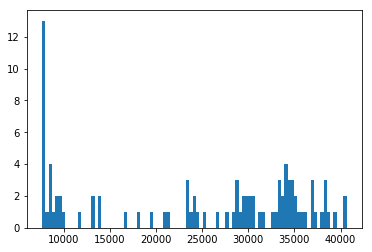

opening img_3-Pos_002_000_000000050_000000000_FarRed_000_050.tif

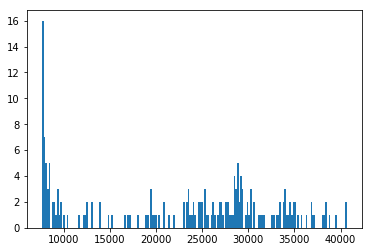

opening img_3-Pos_002_000_000000050_000000000_FarRed_000_050.tif

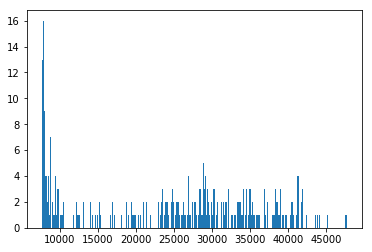

opening img_3-Pos_002_000_000000050_000000000_FarRed_000_050.tif

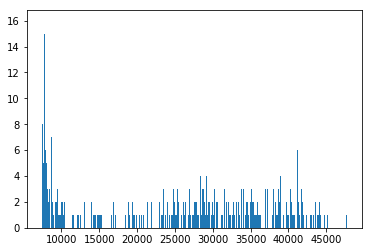

opening img_3-Pos_002_000_000000050_000000000_FarRed_000_050.tif

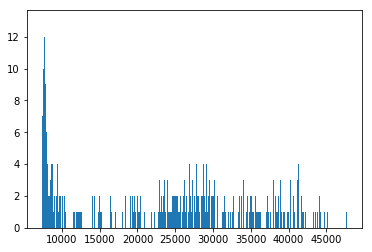

opening img_3-Pos_002_000_000000050_000000000_FarRed_000_050.tif

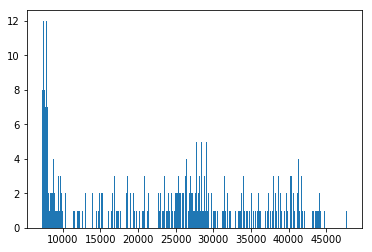

opening img_3-Pos_002_000_000000050_000000000_FarRed_000_050.tif

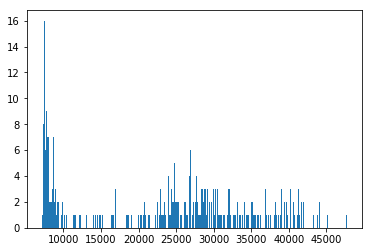

opening img_3-Pos_002_000_000000050_000000000_FarRed_000_050.tif

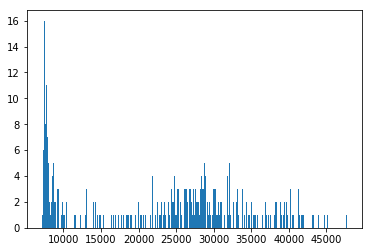

opening img_3-Pos_002_000_000000050_000000000_FarRed_000_050.tif

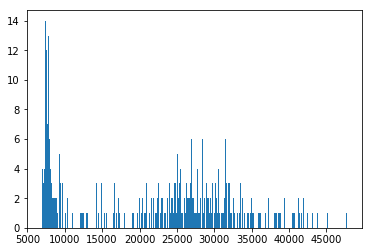

In [61]:
from metadata import Metadata
import numpy as np
import pandas
import matplotlib.pyplot as plt
% matplotlib inline
path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23_Good/'
md = Metadata(path)
Z = '50'
hybe = 'hybe1_5'
Hybe = 'hybe1'
img_df3 = pandas.DataFrame(columns=['posname', 'hybe', 'Mean', 'Std', 'Contrast'])
for hybe in md.image_table.acq.unique():
    if 'hybe' in hybe:
        for pos in md.image_table[md.image_table.acq == hybe].Position.unique():
            Hybe = hybe.split('_')[0]
            img = md.stkread(Channel = 'FarRed',hybe = Hybe, Position = pos,Zindex=Z)
            mean = img.ravel().mean()
            std = img.ravel().std()
            contrast = np.percentile(img.ravel(),99) - np.percentile(img.ravel(),1)
            img_df3 = img_df3.append({'posname':pos, 'hybe':Hybe, 'Zindex':Z, 'Mean':mean, 'Std':std, 'Contrast':contrast},ignore_index=True)
        distribution = img_df3.Mean
        plt.hist(distribution,int(len(distribution)))
        plt.show()

(array([144.,   5.,  19.,  26.,  54.,  80.,  75.,  54.,  50.,  46.,  44.,
         39.,  32.,  28.,  33.,  21.,  22.,   6.,  14.,   5.,  14.,   8.,
          6.,   1.,   4.,   2.,   5.]),
 array([ 3137.        ,  5159.40740741,  7181.81481481,  9204.22222222,
        11226.62962963, 13249.03703704, 15271.44444444, 17293.85185185,
        19316.25925926, 21338.66666667, 23361.07407407, 25383.48148148,
        27405.88888889, 29428.2962963 , 31450.7037037 , 33473.11111111,
        35495.51851852, 37517.92592593, 39540.33333333, 41562.74074074,
        43585.14814815, 45607.55555556, 47629.96296296, 49652.37037037,
        51674.77777778, 53697.18518519, 55719.59259259, 57742.        ]),
 <a list of 27 Patch objects>)

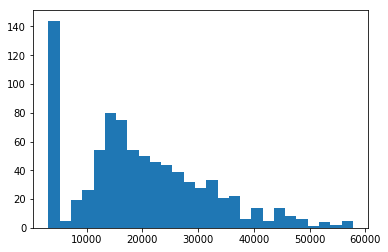

In [67]:
% matplotlib inline
distribution = img_df3.Contrast
plt.hist(distribution,int(len(distribution)/30))


In [55]:
hybe.split('_')[0]

'hybe1'

opening img_3-Pos_000_002_000000103_000000000_FarRed_000_103.tif

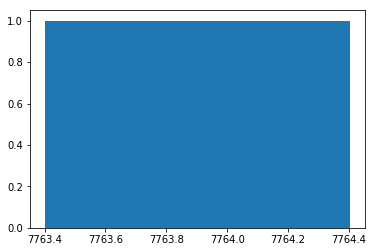

opening img_3-Pos_000_005_000000103_000000000_FarRed_000_103.tif

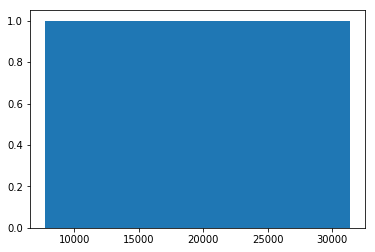

opening img_3-Pos_001_005_000000103_000000000_FarRed_000_103.tif

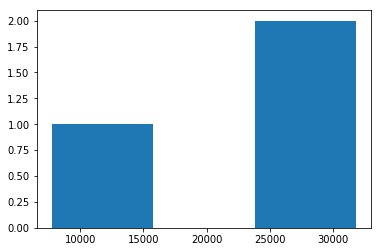

opening img_3-Pos_003_006_000000103_000000000_FarRed_000_103.tif

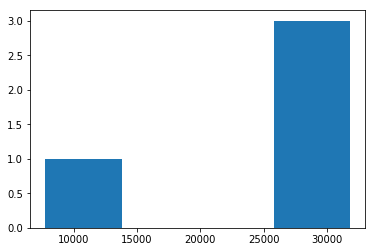

opening img_3-Pos_004_006_000000103_000000000_FarRed_000_103.tif

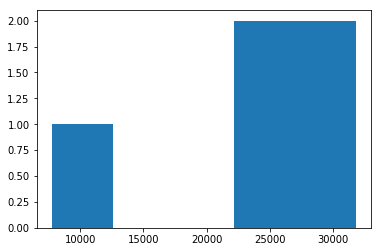

opening img_3-Pos_003_008_000000103_000000000_FarRed_000_103.tif

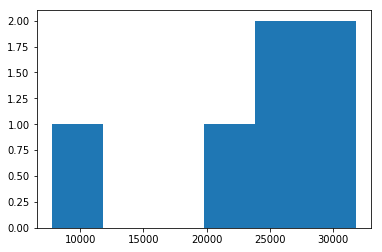

opening img_3-Pos_003_009_000000103_000000000_FarRed_000_103.tif

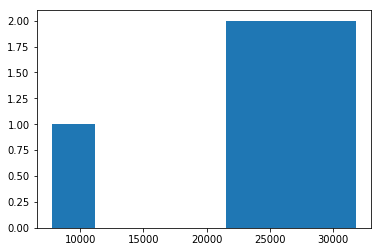

opening img_3-Pos_001_008_000000103_000000000_FarRed_000_103.tif

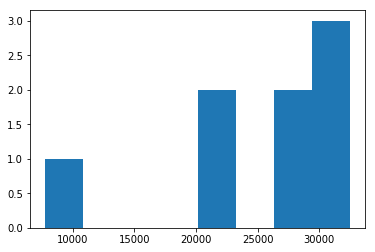

opening img_3-Pos_001_007_000000103_000000000_FarRed_000_103.tif

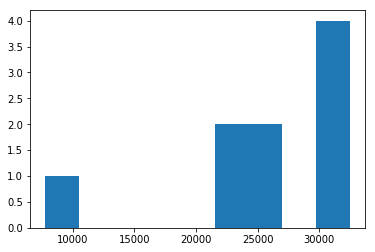

opening img_3-Pos_000_009_000000103_000000000_FarRed_000_103.tif

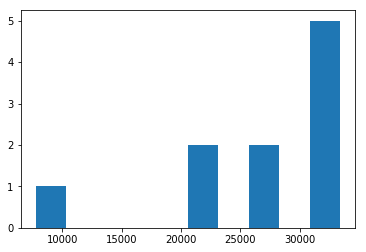

opening img_4-Pos_004_000_000000103_000000000_FarRed_000_103.tif

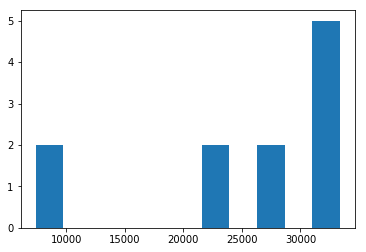

opening img_4-Pos_006_001_000000103_000000000_FarRed_000_103.tif

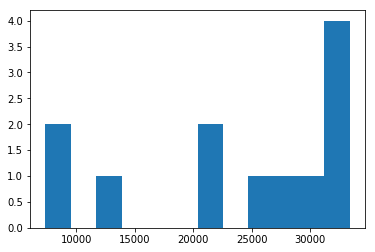

opening img_4-Pos_005_001_000000103_000000000_FarRed_000_103.tif

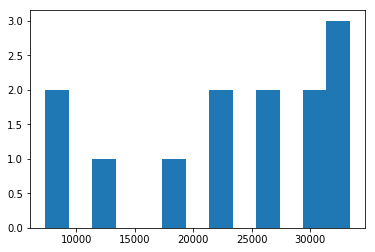

opening img_4-Pos_003_001_000000103_000000000_FarRed_000_103.tif

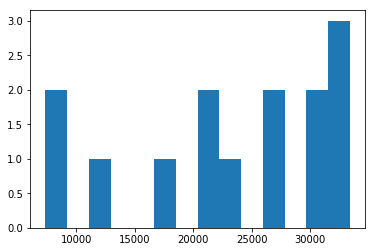

opening img_4-Pos_002_003_000000103_000000000_FarRed_000_103.tif

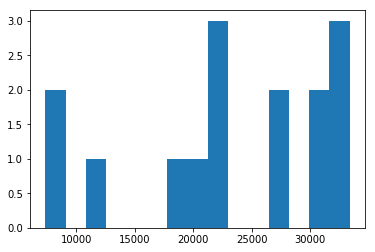

opening img_4-Pos_001_001_000000103_000000000_FarRed_000_103.tif

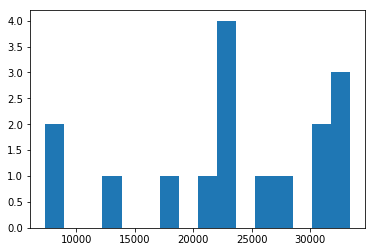

opening img_4-Pos_000_000_000000103_000000000_FarRed_000_103.tif

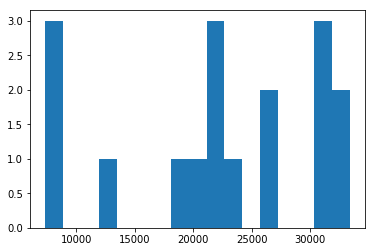

opening img_4-Pos_000_003_000000103_000000000_FarRed_000_103.tif

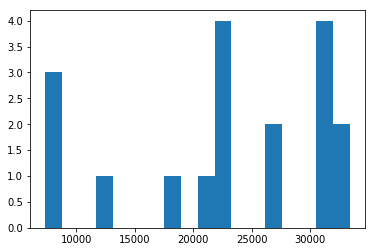

opening img_4-Pos_000_006_000000103_000000000_FarRed_000_103.tif

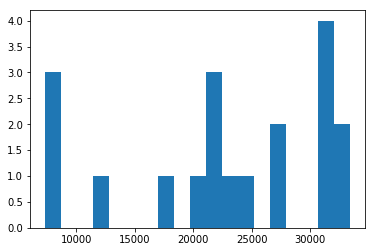

opening img_4-Pos_001_007_000000103_000000000_FarRed_000_103.tif

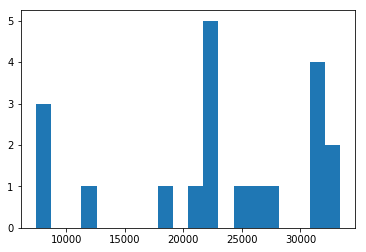

opening img_4-Pos_002_005_000000103_000000000_FarRed_000_103.tif

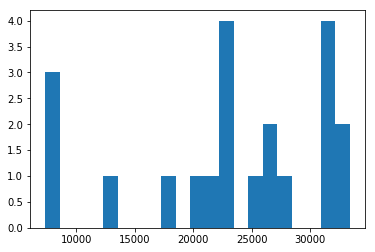

opening img_4-Pos_002_004_000000103_000000000_FarRed_000_103.tif

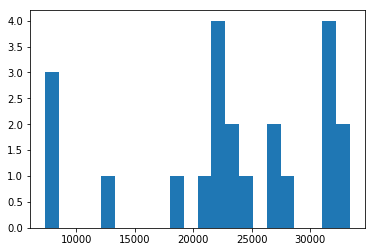

opening img_4-Pos_004_003_000000103_000000000_FarRed_000_103.tif

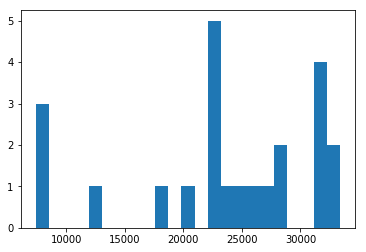

opening img_4-Pos_005_003_000000103_000000000_FarRed_000_103.tif

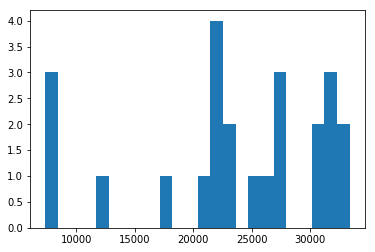

opening img_4-Pos_006_005_000000103_000000000_FarRed_000_103.tif

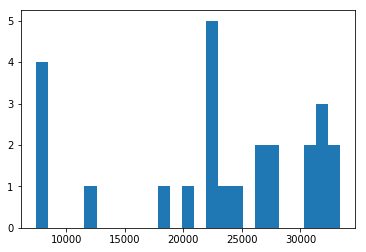

opening img_4-Pos_004_006_000000103_000000000_FarRed_000_103.tif

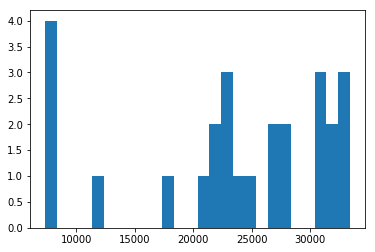

opening img_4-Pos_003_006_000000103_000000000_FarRed_000_103.tif

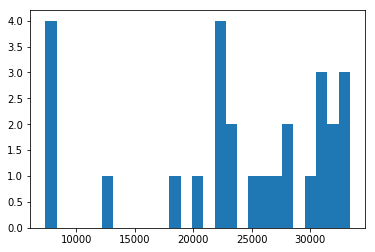

opening img_4-Pos_005_007_000000103_000000000_FarRed_000_103.tif

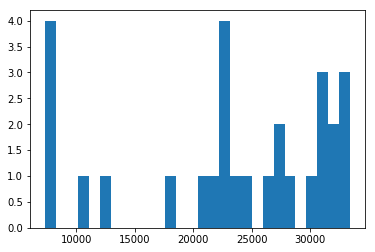

opening img_5-Pos_000_006_000000103_000000000_FarRed_000_103.tif

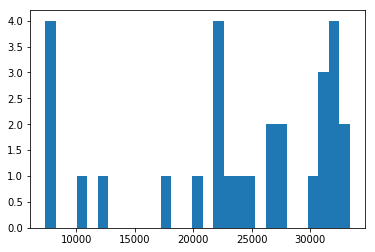

opening img_5-Pos_000_003_000000103_000000000_FarRed_000_103.tif

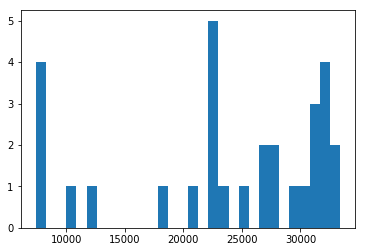

opening img_5-Pos_000_000_000000103_000000000_FarRed_000_103.tif

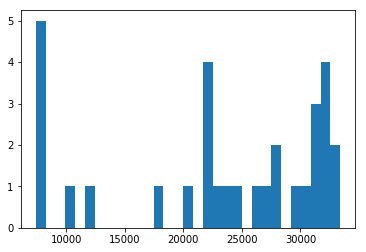

opening img_5-Pos_002_001_000000103_000000000_FarRed_000_103.tif

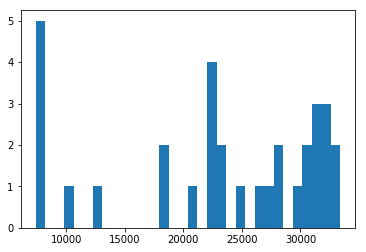

opening img_5-Pos_001_003_000000103_000000000_FarRed_000_103.tif

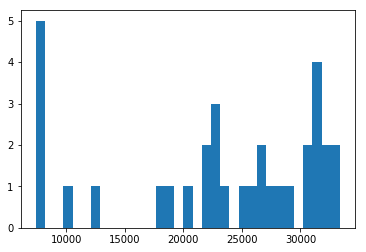

opening img_5-Pos_001_004_000000103_000000000_FarRed_000_103.tif

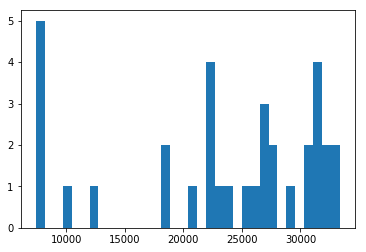

opening img_5-Pos_002_006_000000103_000000000_FarRed_000_103.tif

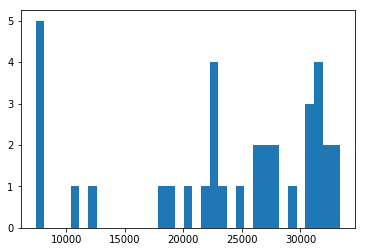

opening img_5-Pos_001_007_000000103_000000000_FarRed_000_103.tif

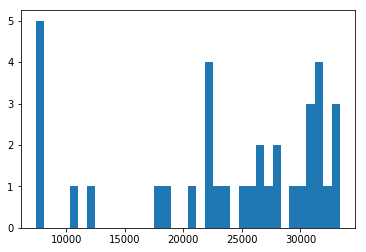

opening img_5-Pos_003_005_000000103_000000000_FarRed_000_103.tif

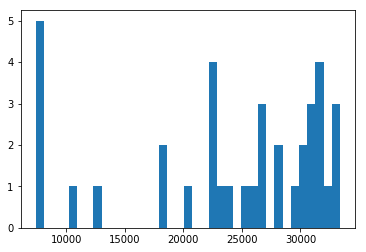

opening img_5-Pos_003_007_000000103_000000000_FarRed_000_103.tif

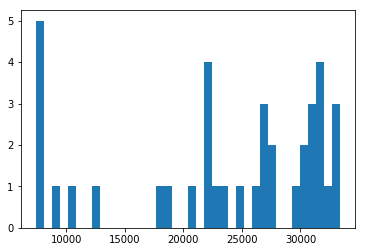

opening img_5-Pos_005_006_000000103_000000000_FarRed_000_103.tif

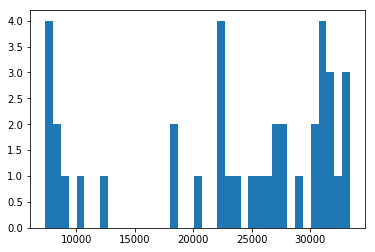

opening img_5-Pos_006_006_000000103_000000000_FarRed_000_103.tif

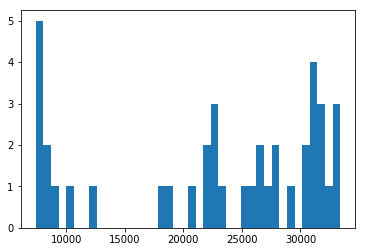

opening img_5-Pos_007_006_000000103_000000000_FarRed_000_103.tif

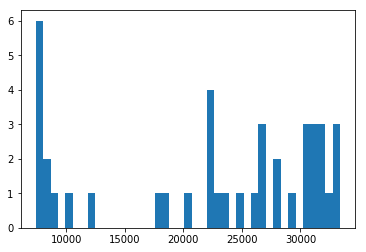

opening img_5-Pos_007_003_000000103_000000000_FarRed_000_103.tif

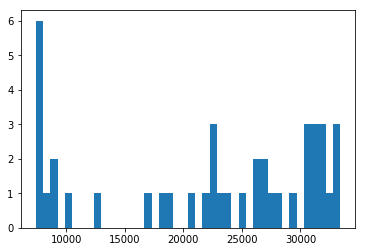

opening img_5-Pos_005_003_000000103_000000000_FarRed_000_103.tif

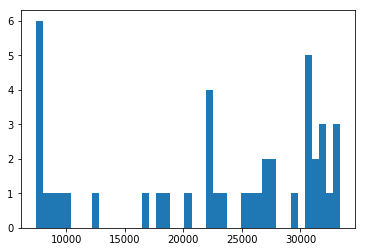

opening img_5-Pos_004_004_000000103_000000000_FarRed_000_103.tif

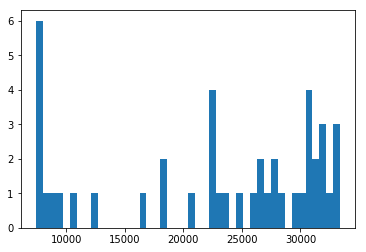

opening img_5-Pos_002_002_000000103_000000000_FarRed_000_103.tif

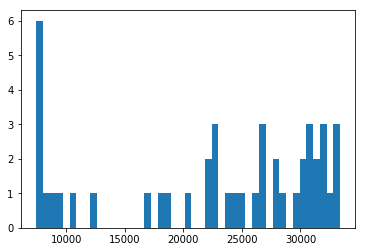

opening img_5-Pos_004_001_000000103_000000000_FarRed_000_103.tif

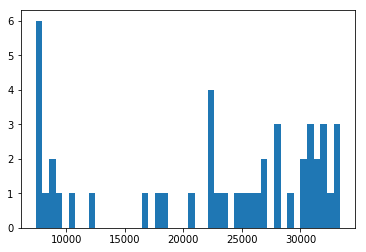

opening img_5-Pos_005_001_000000103_000000000_FarRed_000_103.tif

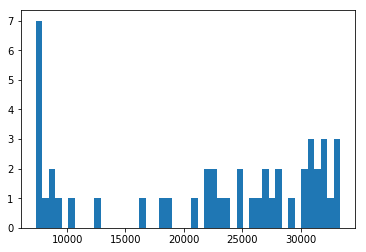

opening img_5-Pos_007_002_000000103_000000000_FarRed_000_103.tif

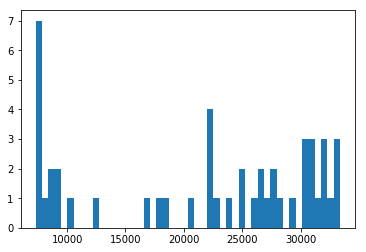

opening img_5-Pos_006_000_000000103_000000000_FarRed_000_103.tif

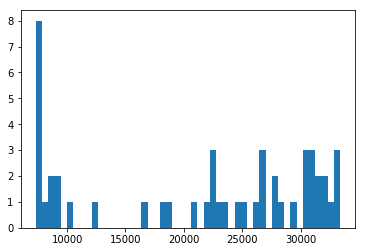

opening img_5-Pos_003_000_000000103_000000000_FarRed_000_103.tif

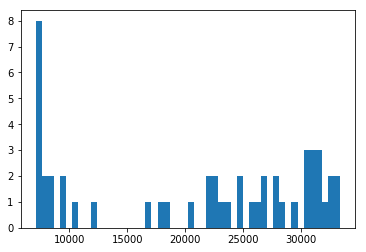

opening img_6-Pos_000_007_000000103_000000000_FarRed_000_103.tif

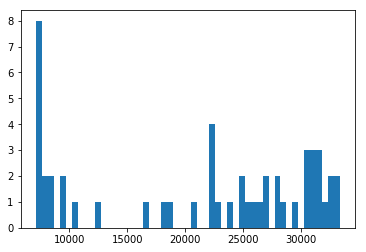

opening img_6-Pos_000_004_000000103_000000000_FarRed_000_103.tif

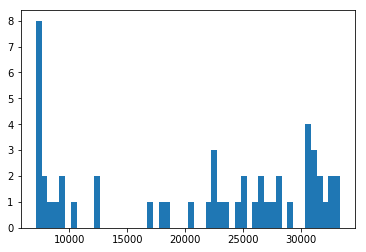

opening img_6-Pos_001_002_000000103_000000000_FarRed_000_103.tif

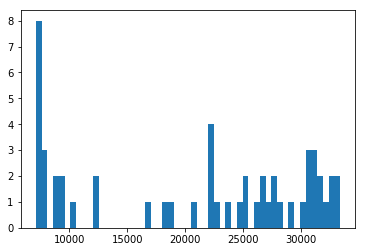

opening img_6-Pos_002_002_000000103_000000000_FarRed_000_103.tif

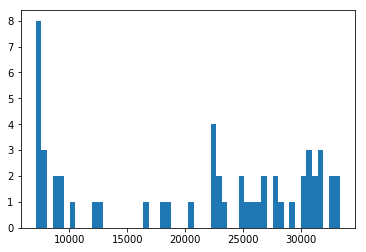

opening img_6-Pos_004_001_000000103_000000000_FarRed_000_103.tif

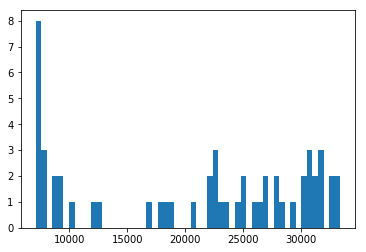

opening img_6-Pos_004_004_000000103_000000000_FarRed_000_103.tif

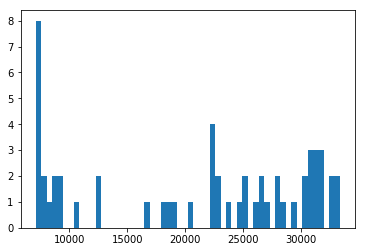

opening img_6-Pos_002_003_000000103_000000000_FarRed_000_103.tif

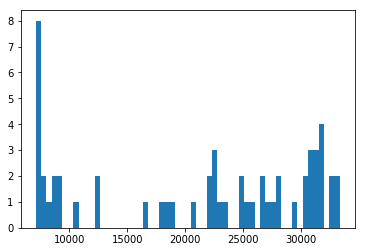

opening img_6-Pos_001_005_000000103_000000000_FarRed_000_103.tif

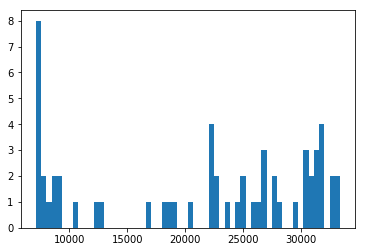

opening img_6-Pos_001_008_000000103_000000000_FarRed_000_103.tif

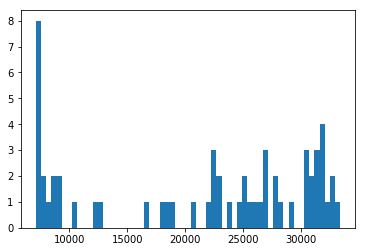

opening img_6-Pos_002_008_000000103_000000000_FarRed_000_103.tif

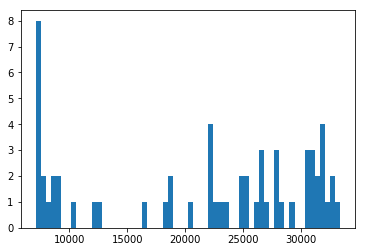

opening img_6-Pos_003_006_000000103_000000000_FarRed_000_103.tif

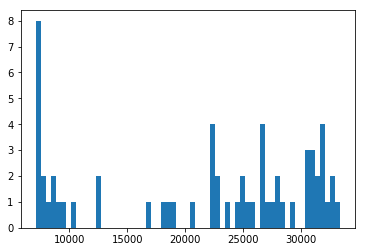

opening img_6-Pos_004_006_000000103_000000000_FarRed_000_103.tif

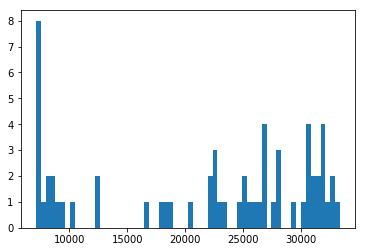

opening img_6-Pos_004_008_000000103_000000000_FarRed_000_103.tif

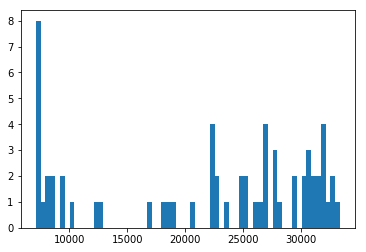

opening img_6-Pos_004_009_000000103_000000000_FarRed_000_103.tif

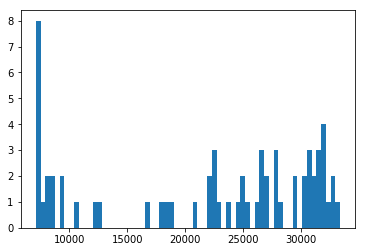

opening img_6-Pos_006_008_000000103_000000000_FarRed_000_103.tif

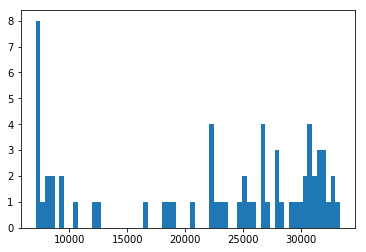

opening img_6-Pos_006_007_000000103_000000000_FarRed_000_103.tif

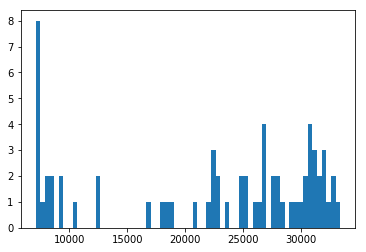

opening img_6-Pos_005_005_000000103_000000000_FarRed_000_103.tif

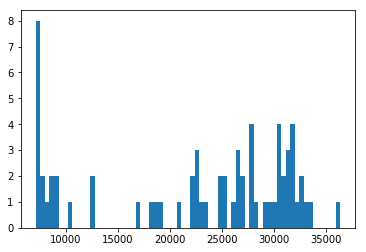

opening img_6-Pos_005_004_000000103_000000000_FarRed_000_103.tif

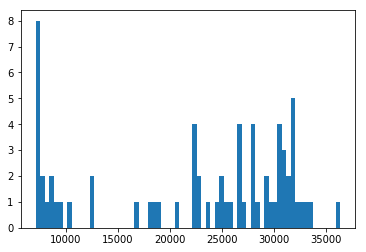

opening img_6-Pos_006_002_000000103_000000000_FarRed_000_103.tif

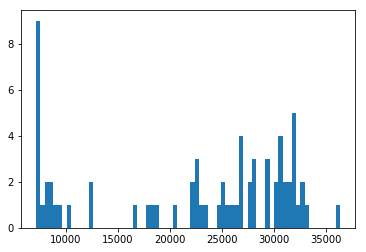

opening img_6-Pos_006_001_000000103_000000000_FarRed_000_103.tif

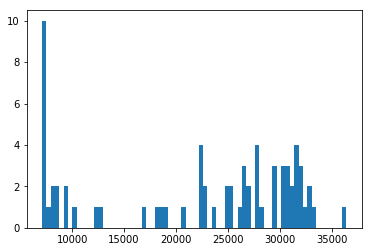

opening img_6-Pos_004_000_000000103_000000000_FarRed_000_103.tif

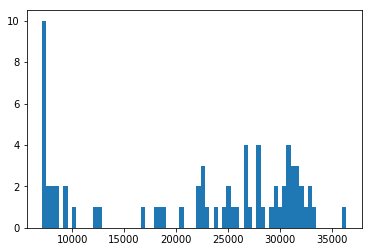

opening img_6-Pos_001_000_000000103_000000000_FarRed_000_103.tif

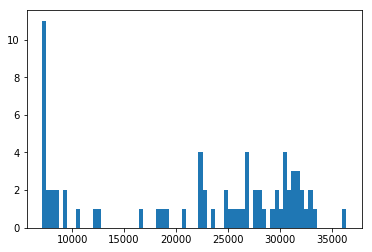

opening img_6-Pos_000_002_000000103_000000000_FarRed_000_103.tif

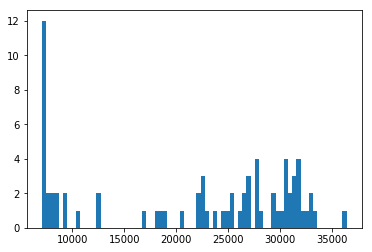

opening img_3-Pos_007_007_000000103_000000000_FarRed_000_103.tif

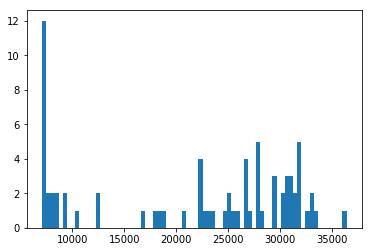

opening img_3-Pos_008_009_000000103_000000000_FarRed_000_103.tif

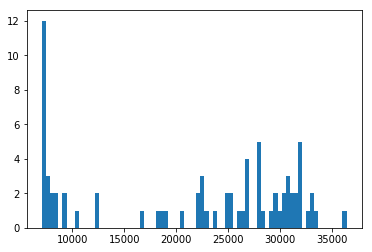

opening img_3-Pos_005_009_000000103_000000000_FarRed_000_103.tif

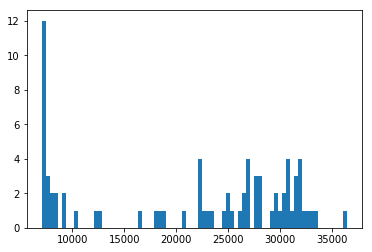

opening img_3-Pos_006_007_000000103_000000000_FarRed_000_103.tif

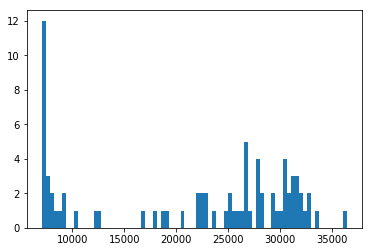

opening img_3-Pos_006_006_000000103_000000000_FarRed_000_103.tif

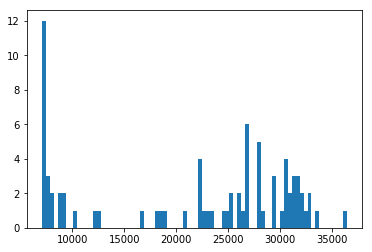

opening img_3-Pos_005_004_000000103_000000000_FarRed_000_103.tif

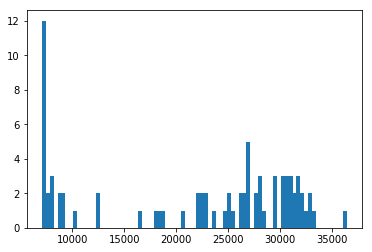

opening img_3-Pos_003_003_000000103_000000000_FarRed_000_103.tif

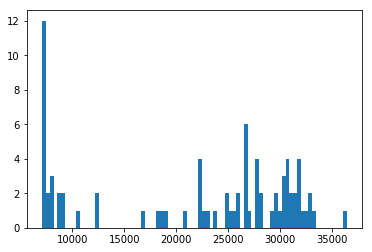

opening img_3-Pos_001_004_000000103_000000000_FarRed_000_103.tif

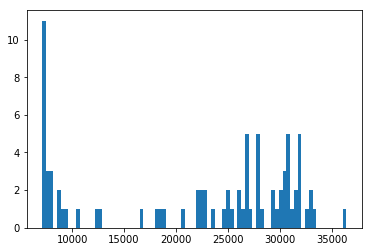

opening img_3-Pos_001_002_000000103_000000000_FarRed_000_103.tif

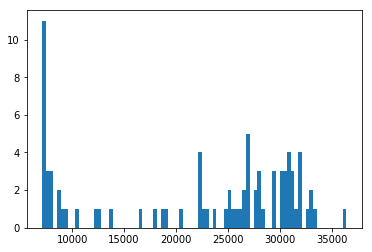

opening img_3-Pos_002_002_000000103_000000000_FarRed_000_103.tif

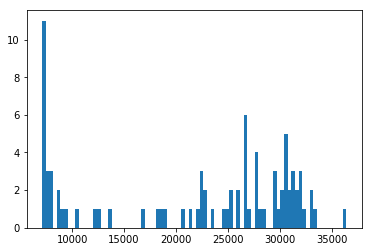

opening img_3-Pos_004_001_000000103_000000000_FarRed_000_103.tif

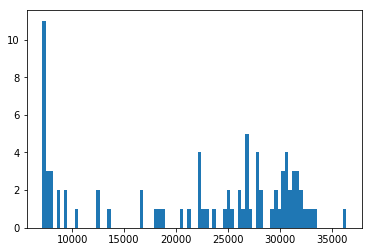

opening img_3-Pos_005_001_000000103_000000000_FarRed_000_103.tif

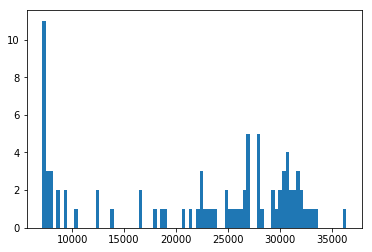

opening img_3-Pos_005_003_000000103_000000000_FarRed_000_103.tif

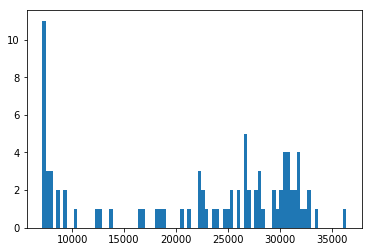

opening img_3-Pos_007_005_000000103_000000000_FarRed_000_103.tif

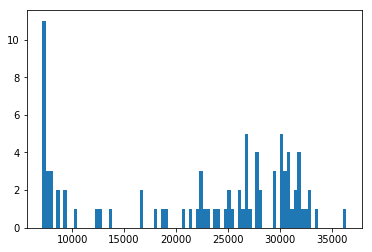

opening img_3-Pos_008_005_000000103_000000000_FarRed_000_103.tif

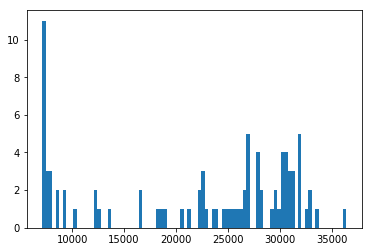

opening img_3-Pos_007_003_000000103_000000000_FarRed_000_103.tif

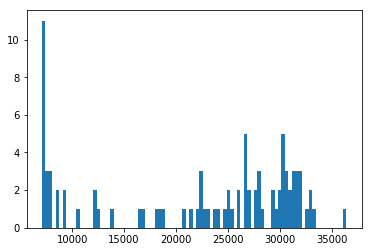

opening img_3-Pos_007_002_000000103_000000000_FarRed_000_103.tif

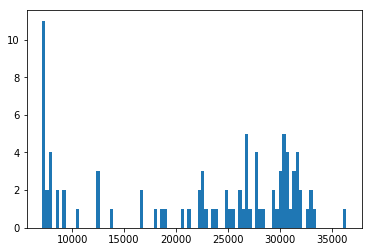

opening img_3-Pos_008_000_000000103_000000000_FarRed_000_103.tif

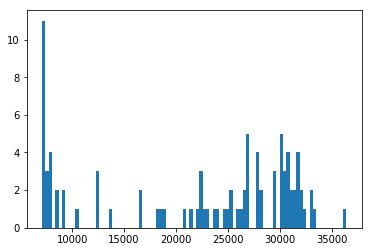

opening img_3-Pos_005_000_000000103_000000000_FarRed_000_103.tif

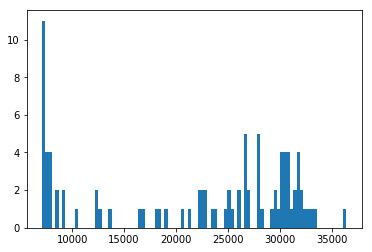

opening img_3-Pos_002_000_000000103_000000000_FarRed_000_103.tif

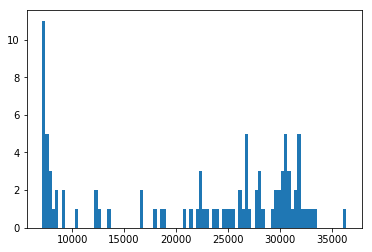

In [44]:
from metadata import Metadata
import numpy as np
import pandas
import matplotlib.pyplot as plt
% matplotlib inline
path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23_Good/'
md = Metadata(path)
Z = '50'
hybe = 'hybe1_5'
Hybe = 'hybe1'
img_df1 = pandas.DataFrame(columns=['posname', 'hybe', 'Mean', 'Std', 'Contrast'])
img_df2 = pandas.DataFrame(columns=['posname', 'hybe','Zindex', 'Mean', 'Std', 'Contrast'])
for pos in md.image_table[md.image_table.acq == hybe].Position.unique():
    for z in md.image_table[md.image_table.Position == pos].Zindex.unique():
        img = md.stkread(Channel = 'FarRed',hybe = Hybe, Position = pos,Zindex=z)
        mean = img.ravel().mean()
        std = img.ravel().std()
        contrast = np.percentile(img.ravel(),99) - np.percentile(img.ravel(),1)
        img_df2 = img_df2.append({'posname':pos, 'hybe':Hybe, 'Zindex':z, 'Mean':mean, 'Std':std, 'Contrast':contrast},ignore_index=True)
    mean = img_df2[img_df2.posname==pos].Mean.mean()
    std = img_df2[img_df2.posname==pos].Std.mean()
    contrast = img_df2[img_df2.posname==pos].Contrast.mean()
    img_df1 = img_df1.append({'posname':pos, 'hybe':Hybe, 'Mean':mean, 'Std':std, 'Contrast':contrast},ignore_index=True)
    distribution = img_df1.Mean
    plt.hist(distribution,int(len(distribution)))
    plt.show()

(array([24.,  4.,  3.,  3.,  8.,  9., 15., 25.,  2.]),
 array([ 7107.69036565, 10359.84070601, 13611.99104636, 16864.14138671,
        20116.29172706, 23368.44206741, 26620.59240776, 29872.74274811,
        33124.89308846, 36377.04342881]),
 <a list of 9 Patch objects>)

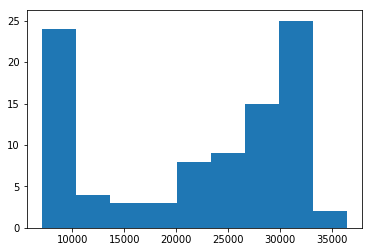

In [54]:
% matplotlib inline
distribution = img_df1.Mean
plt.hist(distribution,int(len(distribution)/10))


(array([1.648e+03, 3.100e+01, 2.700e+01, 2.040e+02, 1.940e+02, 4.730e+02,
        8.030e+02, 1.056e+03, 9.190e+02, 5.500e+02, 2.240e+02, 2.260e+02,
        2.380e+02, 2.500e+02, 3.340e+02, 2.220e+02, 3.500e+02, 3.430e+02,
        2.980e+02, 3.520e+02, 1.570e+02, 9.400e+01, 1.070e+02, 1.030e+02,
        7.800e+01, 7.900e+01, 9.000e+01, 9.300e+01, 3.500e+01, 0.000e+00,
        1.000e+00]),
 array([ 2913.        ,  4598.58064516,  6284.16129032,  7969.74193548,
         9655.32258065, 11340.90322581, 13026.48387097, 14712.06451613,
        16397.64516129, 18083.22580645, 19768.80645161, 21454.38709677,
        23139.96774194, 24825.5483871 , 26511.12903226, 28196.70967742,
        29882.29032258, 31567.87096774, 33253.4516129 , 34939.03225806,
        36624.61290323, 38310.19354839, 39995.77419355, 41681.35483871,
        43366.93548387, 45052.51612903, 46738.09677419, 48423.67741935,
        50109.25806452, 51794.83870968, 53480.41935484, 55166.        ]),
 <a list of 31 Patch objects>)

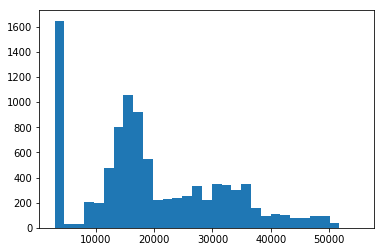

In [69]:
% matplotlib inline
distribution = img_df2.Contrast
plt.hist(distribution,int(len(distribution)/300))

In [83]:
for pos in img_df1[img_df1.Contrast<10000].posname:
    print(pos, md.image_table[md.image_table.Position ==pos].root_pth.iloc[0].split('/')[0])

3-Pos_000_002 Pos2
3-Pos_003_009 Pos20
4-Pos_004_000 Pos32
4-Pos_000_000 Pos50
4-Pos_006_005 Pos74
5-Pos_006_006 Pos119
5-Pos_007_006 Pos122
5-Pos_005_001 Pos140
5-Pos_006_000 Pos146
5-Pos_003_000 Pos149
6-Pos_006_002 Pos206
6-Pos_006_001 Pos209
6-Pos_004_000 Pos212
6-Pos_001_000 Pos215
6-Pos_000_002 Pos218
3-Pos_008_009 Pos224
3-Pos_008_000 Pos272
3-Pos_005_000 Pos275
3-Pos_002_000 Pos278


In [80]:
#md = Metadata('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23_Good/hybe1_5')
md.image_table[md.image_table.Position =='4-Pos_004_000'].root_pth.iloc[0]

'Pos32/img_4-Pos_004_000_000000001_000000000_FarRed_000_001.tif'

In [70]:
pos = '3-Pos_001_005'
good_img = md.stkread(Channel = 'Orange',hybe = 'hybe1', Position = pos,Zindex=50)
img = good_img
mean = img.ravel().mean()
print('mean',mean)
std = img.ravel().std()
print('std',std)
contrast = np.percentile(img.ravel(),99) - np.percentile(img.ravel(),1)
print('contrast',contrast)
pos = '3-Pos_000_002'
bad_img = md.stkread(Channel = 'Orange',hybe = 'hybe1', Position = pos,Zindex=50)
img = bad_img
mean = img.ravel().mean()
print('mean',mean)
std = img.ravel().std()
print('std',std)
contrast = np.percentile(img.ravel(),99) - np.percentile(img.ravel(),1)
print('contrast',contrast)

opening img_3-Pos_001_005_000000050_000000000_Orange_000_050.tifmean 17133.028115987778
std 9823.943681271
contrast 57710.0
opening img_3-Pos_000_002_000000050_000000000_Orange_000_050.tifmean 2933.3521780967712
std 4004.0354140251015
contrast 13732.0


In [66]:
#img = md.stkread(Channel = 'Orange',hybe = Hybe, Position = pos)
img = good_img
mean = img.ravel().mean()
print('mean',mean)
std = img.ravel().std()
print('std',std)
contrast = np.percentile(img.ravel(),99) - np.percentile(img.ravel(),1)
print('contrast',contrast)

mean 16740.60369867723
std 8130.973587423111
contrast 50428.0


In [67]:
#img = md.stkread(Channel = 'Orange',hybe = Hybe, Position = pos)
img = bad_img_img
mean = img.ravel().mean()
print('mean',mean)
std = img.ravel().std()
print('std',std)
contrast = np.percentile(img.ravel(),99) - np.percentile(img.ravel(),1)
print('contrast',contrast)

mean 3147.9077520787137
std 4096.763166866746
contrast 24886.0


<IPython.core.display.Javascript object>


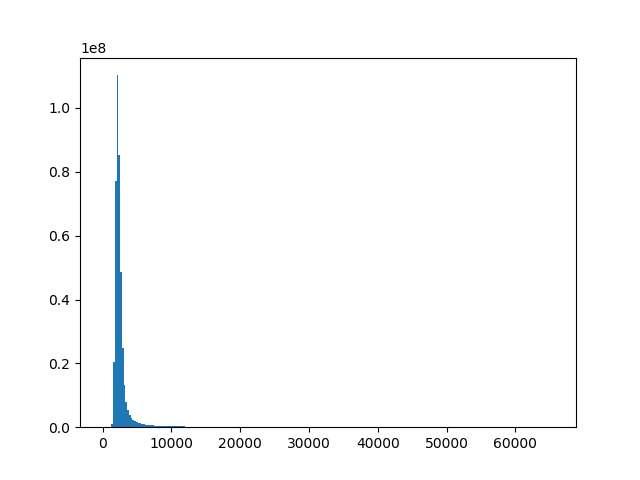

(array([1.01700000e+03, 2.89900000e+03, 1.09950000e+04, 3.89040000e+04,
        1.31838000e+05, 8.80626000e+05, 2.03089700e+07, 7.70286810e+07,
        1.10265843e+08, 8.51832350e+07, 4.87681940e+07, 2.49050040e+07,
        1.33358480e+07, 8.03485400e+06, 5.41757700e+06, 3.95016700e+06,
        3.01548000e+06, 2.38426700e+06, 1.93874200e+06, 1.61157000e+06,
        1.36577800e+06, 1.17240000e+06, 1.02397000e+06, 9.04312000e+05,
        8.09575000e+05, 7.27552000e+05, 6.58797000e+05, 6.02758000e+05,
        5.54554000e+05, 5.16466000e+05, 4.82895000e+05, 4.56226000e+05,
        4.31563000e+05, 4.14655000e+05, 3.98077000e+05, 3.83606000e+05,
        3.70153000e+05, 3.58343000e+05, 3.44408000e+05, 3.29459000e+05,
        3.14083000e+05, 2.97810000e+05, 2.82256000e+05, 2.65151000e+05,
        2.49608000e+05, 2.34498000e+05, 2.21242000e+05, 2.08797000e+05,
        1.96883000e+05, 1.85164000e+05, 1.73602000e+05, 1.63139000e+05,
        1.51064000e+05, 1.40980000e+05, 1.30339000e+05, 1.204640

In [64]:
plt.hist(bad_img.ravel(),256)

<IPython.core.display.Javascript object>


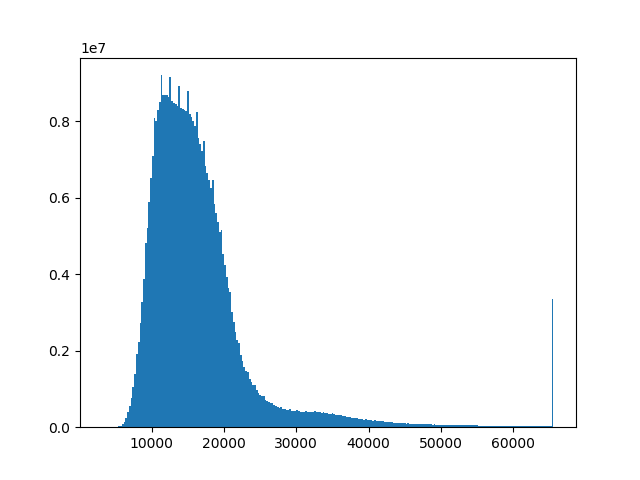

(array([2.000000e+00, 1.000000e+00, 1.100000e+01, 2.300000e+01,
        1.010000e+02, 3.210000e+02, 1.074000e+03, 3.105000e+03,
        8.046000e+03, 2.085500e+04, 4.196700e+04, 8.064200e+04,
        1.410140e+05, 2.335000e+05, 3.915230e+05, 5.500880e+05,
        7.758770e+05, 1.056140e+06, 1.387415e+06, 1.903005e+06,
        2.239223e+06, 2.733591e+06, 3.275334e+06, 3.868522e+06,
        4.829104e+06, 5.214624e+06, 5.884294e+06, 6.514024e+06,
        7.087365e+06, 8.094965e+06, 7.994562e+06, 8.289362e+06,
        8.495914e+06, 9.204639e+06, 8.691609e+06, 8.698341e+06,
        8.678863e+06, 8.643033e+06, 9.162744e+06, 8.537147e+06,
        8.489741e+06, 8.447130e+06, 8.408488e+06, 8.928155e+06,
        8.338020e+06, 8.319276e+06, 8.295397e+06, 8.269605e+06,
        8.778872e+06, 8.181076e+06, 8.108558e+06, 8.006011e+06,
        7.889161e+06, 8.250483e+06, 7.571105e+06, 7.396645e+06,
        7.215556e+06, 7.496110e+06, 6.830634e+06, 6.641102e+06,
        6.463317e+06, 6.256895e+06, 6.45

In [63]:
plt.hist(good_img.ravel(),256)

<IPython.core.display.Javascript object>


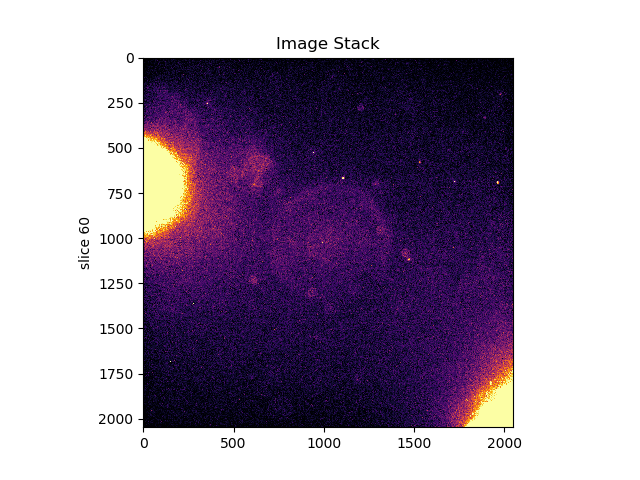

In [57]:
from pyvis import stkshow
import matplotlib.pyplot as plt
% matplotlib notebook
stkshow(bad_img)

In [49]:
md.image_table[md.image_table.acq == 'hybe1_5'][md.image_table.Position == pos]

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,FlatField,df_pos,linescan,Position,group,acq,frame,TimestampImage,XY,PixelSize,...,Z,Zindex,XYbeforeTransform,Exposure,Channel,Triggered,Skip,TimestampFrame,filename,root_pth
28741,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe1_5,1,737387.894008,"[4612.0, 5056.0]",0.1032,...,3053.888,1,"[4612.094, 5055.8035]",475,FarRed,False,1,737387.894015,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000001_000000000_Far...
28742,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe1_5,1,737387.894017,"[4612.0, 5056.0]",0.1032,...,3053.888,1,"[4612.094, 5055.8035]",600,Orange,False,1,737387.894015,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000001_000000000_Ora...
28743,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe1_5,1,737387.894020,"[4612.0, 5056.0]",0.1032,...,3053.888,1,"[4612.094, 5055.8035]",50,DeepBlue,False,1,737387.894015,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000001_000000000_Dee...
28744,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe1_5,1,737387.894029,"[4612.0, 5056.0]",0.1032,...,3054.289,2,"[4612.094, 5055.8035]",475,FarRed,False,1,737387.894036,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000002_000000000_Far...
28745,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe1_5,1,737387.894038,"[4612.0, 5056.0]",0.1032,...,3054.289,2,"[4612.094, 5055.8035]",600,Orange,False,1,737387.894036,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000002_000000000_Ora...
28746,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe1_5,1,737387.894041,"[4612.0, 5056.0]",0.1032,...,3054.289,2,"[4612.094, 5055.8035]",50,DeepBlue,False,1,737387.894036,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000002_000000000_Dee...
28747,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe1_5,1,737387.894050,"[4612.0, 5056.0]",0.1032,...,3054.691,3,"[4612.094, 5055.8035]",475,FarRed,False,1,737387.894057,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000003_000000000_Far...
28748,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe1_5,1,737387.894059,"[4612.0, 5056.0]",0.1032,...,3054.691,3,"[4612.094, 5055.8035]",600,Orange,False,1,737387.894057,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000003_000000000_Ora...
28749,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe1_5,1,737387.894062,"[4612.0, 5056.0]",0.1032,...,3054.691,3,"[4612.094, 5055.8035]",50,DeepBlue,False,1,737387.894057,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000003_000000000_Dee...
28750,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe1_5,1,737387.894070,"[4612.0, 5056.0]",0.1032,...,3055.093,4,"[4612.094, 5055.8035]",475,FarRed,False,1,737387.894077,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000004_000000000_Far...


In [ ]:
python /home/zach/PythonRepos/PySpots/analysis_scripts/find_beads.py /hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/ /hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/ -p 4

In [3]:
import pickle
beads = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/beads.pkl','rb'))
beads_found = []
for pos in beads.keys():
    print(pos)
    for hybe in beads[pos].keys():
        beads_found.append(len(beads[pos][hybe]))
        print(hybe,len(beads[pos][hybe]),'beads found')

3-Pos_000_002
hybe1 957 beads found
hybe2 937 beads found
hybe3 960 beads found
hybe4 960 beads found
hybe5 950 beads found
hybe6 928 beads found
hybe7 921 beads found
hybe8 917 beads found
hybe9 898 beads found
nucstain 35 beads found
3-Pos_000_005
hybe1 217 beads found
hybe2 207 beads found
hybe3 194 beads found
hybe4 195 beads found
hybe5 172 beads found
hybe6 167 beads found
hybe7 152 beads found
hybe8 154 beads found
hybe9 143 beads found
nucstain 24 beads found
3-Pos_001_005
hybe1 275 beads found
hybe2 260 beads found
hybe3 247 beads found
hybe4 237 beads found
hybe5 209 beads found
hybe6 200 beads found
hybe7 198 beads found
hybe8 181 beads found
hybe9 158 beads found
nucstain 20 beads found
3-Pos_003_006
hybe1 117 beads found
hybe2 124 beads found
hybe3 123 beads found
hybe4 120 beads found
hybe5 116 beads found
hybe6 111 beads found
hybe7 101 beads found
hybe8 106 beads found
hybe9 89 beads found
nucstain 17 beads found
3-Pos_004_006
hybe1 87 beads found
hybe2 83 beads found
h

hybe4 8 beads found
hybe5 8 beads found
hybe6 8 beads found
hybe7 8 beads found
hybe8 8 beads found
hybe9 8 beads found
nucstain 0 beads found
6-Pos_000_004
hybe1 743 beads found
hybe2 727 beads found
hybe3 730 beads found
hybe4 721 beads found
hybe5 703 beads found
hybe6 699 beads found
hybe7 694 beads found
hybe8 689 beads found
hybe9 685 beads found
nucstain 21 beads found
6-Pos_001_002
hybe1 836 beads found
hybe2 849 beads found
hybe3 845 beads found
hybe4 849 beads found
hybe5 846 beads found
hybe6 840 beads found
hybe7 837 beads found
hybe8 839 beads found
hybe9 836 beads found
nucstain 23 beads found
6-Pos_002_002
hybe1 490 beads found
hybe2 488 beads found
hybe3 487 beads found
hybe4 473 beads found
hybe5 460 beads found
hybe6 462 beads found
hybe7 459 beads found
hybe8 447 beads found
hybe9 437 beads found
nucstain 29 beads found
6-Pos_004_001
hybe1 762 beads found
hybe2 755 beads found
hybe3 762 beads found
hybe4 760 beads found
hybe5 751 beads found
hybe6 726 beads found
hyb

<IPython.core.display.Javascript object>


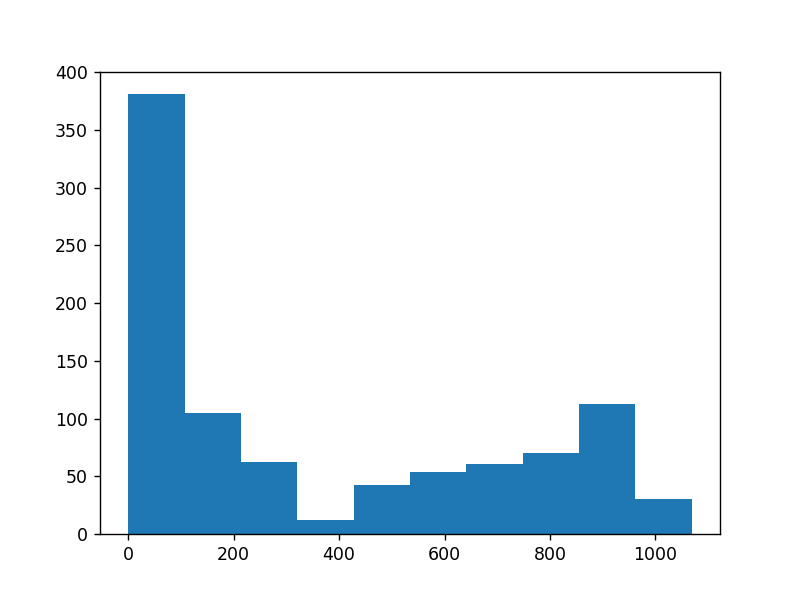

(array([381., 105.,  62.,  12.,  42.,  54.,  61.,  70., 113.,  30.]),
 array([   0. ,  106.9,  213.8,  320.7,  427.6,  534.5,  641.4,  748.3,
         855.2,  962.1, 1069. ]),
 <a list of 10 Patch objects>)

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.hist(beads_found)

In [ ]:
python /home/zach/PythonRepos/PySpots/analysis_scripts/find_tforms.py /hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/beads.pkl /hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/tforms.pkl

In [28]:
import pickle
#tforms = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23(Good)/results/tforms.pkl','rb'))
for pos in tforms['good'].keys():
    print(pos)
    for hybe in tforms['good'][pos].keys():
        print(hybe,tforms['good'][pos][hybe][0],'tforms found')
        #print(hybe,tforms['good'][pos][hybe][1],'residual found')

3-Pos_000_002
hybe1 [0 0 0] tforms found
hybe2 [-1.40011833 -0.40000596 -0.80000149] tforms found
hybe3 [1.39990742e+00 6.06439739e-01 4.85697734e-06] tforms found
hybe4 [0.59907255 1.19998501 0.60023825] tforms found
hybe5 [-2.40418594  0.59998178 -1.00002109] tforms found
hybe6 [ 1.59999161 -4.00005857 -0.99999239] tforms found
hybe7 [ 0.59999453 -1.79999452 -1.0000682 ] tforms found
hybe8 [-1.20001275 -0.200016   -0.39996242] tforms found
hybe9 [-1.40003000e+00 -4.00373869e-01 -7.22495577e-06] tforms found
nucstain N tforms found
3-Pos_000_005
hybe1 [0 0 0] tforms found
hybe2 [ 0.40001922 -0.79999889 -0.1997146 ] tforms found
hybe3 [ 2.19999236  0.40000184 -0.39982671] tforms found
hybe4 [ 1.60005944  1.4000229  -0.99997715] tforms found
hybe5 [-1.60001431  0.79965019 -0.99991387] tforms found
hybe6 [ 2.40015867 -3.79999976 -0.59999105] tforms found
hybe7 [ 1.80000488 -1.40016332 -0.19999565] tforms found
hybe8 [ 0.20007294 -0.20000897 -1.00005185] tforms found
hybe9 [-0.80004589 -0

In [6]:
import pickle
pth = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/tforms.pkl'
tforms = pickle.load(open(pth,'rb'))
for pos in tforms['good'].keys():
    for hybe in tforms['good'][pos].keys():
        if hybe == 'nucstain':
            tforms['good'][pos][hybe] = tforms['good'][pos]['hybe1']
            print(tforms['good'][pos][hybe])

(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(

In [8]:
pickle.dump(tforms,open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/tforms2.pkl','wb'))

In [9]:
import pickle
pth = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/tforms2.pkl'
tforms = pickle.load(open(pth,'rb'))
for pos in tforms['good'].keys():
    for hybe in tforms['good'][pos].keys():
        # hybe == 'nucstain':
            #tforms['good'][pos][hybe] = tforms['good'][pos]['hybe1']
        print(tforms['good'][pos][hybe])

(array([0, 0, 0]), 0, inf)
(array([-1.40011833, -0.40000596, -0.80000149]), 0.24222460455572342, 930)
(array([1.39990742e+00, 6.06439739e-01, 4.85697734e-06]), 0.19732362546403379, 939)
(array([0.59907255, 1.19998501, 0.60023825]), 0.19748873204669806, 934)
(array([-2.40418594,  0.59998178, -1.00002109]), 0.23090520283408436, 928)
(array([ 1.59999161, -4.00005857, -0.99999239]), 0.21301730970454122, 912)
(array([ 0.59999453, -1.79999452, -1.0000682 ]), 0.23399728439459022, 908)
(array([-1.20001275, -0.200016  , -0.39996242]), 0.1807173684540482, 902)
(array([-1.40003000e+00, -4.00373869e-01, -7.22495577e-06]), 0.18948077629808238, 882)
(array([0, 0, 0]), 0, inf)
(array([0, 0, 0]), 0, inf)
(array([ 0.40001922, -0.79999889, -0.1997146 ]), 0.23178462388661727, 193)
(array([ 2.19999236,  0.40000184, -0.39982671]), 0.23971126534772177, 183)
(array([ 1.60005944,  1.4000229 , -0.99997715]), 0.19924209220188185, 174)
(array([-1.60001431,  0.79965019, -0.99991387]), 0.2443369715050496, 155)
(ar

In [ ]:
python /home/zach/PythonRepos/PySpots/analysis_scripts/onfly_decon_codestacks.py /hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/ seqfish_config_Inflammation /hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/tforms.pkl /hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/codestacks -p 1 -k 1 -i 2 -s 5 -m 100 --decon_gpu 1

In [9]:
!pip install -e /home/zach/PythonRepos/PyImages/

Obtaining file:///home/zach/PythonRepos/PyImages
  Found existing installation: pyimages 0.1
    Uninstalling pyimages-0.1:
      Successfully uninstalled pyimages-0.1
  Running setup.py develop for pyimages
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from metadata import Metadata
from fish_results import HybeData
import numpy as np
import pickle
import importlib
import os

md = Metadata('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/')
seqfish_config = importlib.import_module('seqfish_config_Inflammation')
bitmap = seqfish_config.bitmap
pfunc = partial(hdata_multi_z_pseudo_maxprjZ_wrapper, md=md, k=1, zstart=5, zskip=2, zmax=100, ndecon_iter=10)
good_positions = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/tforms.pkl', 'rb'))['good']
func_inputs = []
for p, t in good_positions.items():
    tforms_xyz = {k: (v[0][0], v[0][1], int(np.round(np.mean(v[0][2])))) for k, v in t.items()}
    txy = {k: (v[0], v[1]) for k, v in tforms_xyz.items()}
    tzz = {k: v[2] for k, v in tforms_xyz.items()}
    func_inputs.append((HybeData(os.path.join('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/codestacks/',p)), p, txy, tzz))

FileNotFoundError: [Errno 2] No such file or directory: '/home/zach/Documents/PySpots/hybescope_config/MHD4_18bit_187cwords.csv'

In [2]:
!pip install -e /home/zach/PythonRepos/PySpots/

Obtaining file:///home/zach/PythonRepos/PySpots
  Found existing installation: pyspots 0.1
    Uninstalling pyspots-0.1:
      Successfully uninstalled pyspots-0.1
  Running setup.py develop for pyspots
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [61]:
from fish_results import *
hdata = HybeData('/bigstore/GeneralStorage/Zach/FISHAnalysis/Predigest_First_2018Nov13/codestacks/')

/home/zach/Documents/PySpots/fish_results.py:72: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  hdata = pandas.concat(all_mds, ignore_index=True)


In [62]:
hdata.metadata

,Unnamed: 0,dtype,filename,posname,zindex
0,0.0,cstk,cstk_Pos0_z_6.tif,Pos0,6
1,1.0,nf,nf_Pos0_z_6.csv,Pos0,6
2,2.0,cimg,cimg_Pos0_z_6.tif,Pos0,6
3,3.0,cstk,cstk_Pos0_z_10.tif,Pos0,10
4,4.0,nf,nf_Pos0_z_10.csv,Pos0,10
5,5.0,cimg,cimg_Pos0_z_10.tif,Pos0,10
6,6.0,cstk,cstk_Pos0_z_14.tif,Pos0,14
7,7.0,nf,nf_Pos0_z_14.csv,Pos0,14
8,8.0,cimg,cimg_Pos0_z_14.tif,Pos0,14
9,9.0,cstk,cstk_Pos0_z_18.tif,Pos0,18


In [2]:
from metadata import Metadata
md = Metadata('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23_Good/')

In [10]:
len(md.image_table[md.image_table.Position =='4-Pos_000_006'])

2884

In [9]:
len(md.image_table)-len(md.image_table[md.image_table.Position !='4-Pos_000_006'])

2884

In [7]:
md.image_table[md.image_table.Position !='4-Pos_000_006']

,FlatField,df_pos,linescan,Position,group,acq,frame,TimestampImage,XY,PixelSize,...,Z,Zindex,XYbeforeTransform,Exposure,Channel,Triggered,Skip,TimestampFrame,filename,root_pth
0,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680372,"[4612.0, 5056.0]",0.1032,...,3068.838,1,"[4612.094, 5055.8035]",475,FarRed,False,1,737389.680379,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000001_000000000_Far...
1,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680381,"[4612.0, 5056.0]",0.1032,...,3068.838,1,"[4612.094, 5055.8035]",600,Orange,False,1,737389.680379,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000001_000000000_Ora...
2,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680384,"[4612.0, 5056.0]",0.1032,...,3068.838,1,"[4612.094, 5055.8035]",50,DeepBlue,False,1,737389.680379,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000001_000000000_Dee...
3,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680393,"[4612.0, 5056.0]",0.1032,...,3069.239,2,"[4612.094, 5055.8035]",475,FarRed,False,1,737389.680400,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000002_000000000_Far...
4,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680402,"[4612.0, 5056.0]",0.1032,...,3069.239,2,"[4612.094, 5055.8035]",600,Orange,False,1,737389.680400,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000002_000000000_Ora...
5,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680405,"[4612.0, 5056.0]",0.1032,...,3069.239,2,"[4612.094, 5055.8035]",50,DeepBlue,False,1,737389.680400,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000002_000000000_Dee...
6,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680414,"[4612.0, 5056.0]",0.1032,...,3069.641,3,"[4612.094, 5055.8035]",475,FarRed,False,1,737389.680421,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000003_000000000_Far...
7,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680423,"[4612.0, 5056.0]",0.1032,...,3069.641,3,"[4612.094, 5055.8035]",600,Orange,False,1,737389.680421,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000003_000000000_Ora...
8,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680426,"[4612.0, 5056.0]",0.1032,...,3069.641,3,"[4612.094, 5055.8035]",50,DeepBlue,False,1,737389.680421,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000003_000000000_Dee...
9,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680435,"[4612.0, 5056.0]",0.1032,...,3070.043,4,"[4612.094, 5055.8035]",475,FarRed,False,1,737389.680442,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000004_000000000_Far...


In [6]:
md.base_pth

'/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23_Good/'

In [11]:
md.image_table = md.image_table[md.image_table.Position !='4-Pos_000_006']

In [13]:
md.image_table[md.image_table.acq==md.image_table.acq.unique()[0]]

,FlatField,df_pos,linescan,Position,group,acq,frame,TimestampImage,XY,PixelSize,...,Z,Zindex,XYbeforeTransform,Exposure,Channel,Triggered,Skip,TimestampFrame,filename,root_pth
0,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680372,"[4612.0, 5056.0]",0.1032,...,3068.838,1,"[4612.094, 5055.8035]",475,FarRed,False,1,737389.680379,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000001_000000000_Far...
1,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680381,"[4612.0, 5056.0]",0.1032,...,3068.838,1,"[4612.094, 5055.8035]",600,Orange,False,1,737389.680379,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000001_000000000_Ora...
2,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680384,"[4612.0, 5056.0]",0.1032,...,3068.838,1,"[4612.094, 5055.8035]",50,DeepBlue,False,1,737389.680379,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000001_000000000_Dee...
3,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680393,"[4612.0, 5056.0]",0.1032,...,3069.239,2,"[4612.094, 5055.8035]",475,FarRed,False,1,737389.680400,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000002_000000000_Far...
4,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680402,"[4612.0, 5056.0]",0.1032,...,3069.239,2,"[4612.094, 5055.8035]",600,Orange,False,1,737389.680400,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000002_000000000_Ora...
5,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680405,"[4612.0, 5056.0]",0.1032,...,3069.239,2,"[4612.094, 5055.8035]",50,DeepBlue,False,1,737389.680400,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000002_000000000_Dee...
6,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680414,"[4612.0, 5056.0]",0.1032,...,3069.641,3,"[4612.094, 5055.8035]",475,FarRed,False,1,737389.680421,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000003_000000000_Far...
7,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680423,"[4612.0, 5056.0]",0.1032,...,3069.641,3,"[4612.094, 5055.8035]",600,Orange,False,1,737389.680421,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000003_000000000_Ora...
8,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680426,"[4612.0, 5056.0]",0.1032,...,3069.641,3,"[4612.094, 5055.8035]",50,DeepBlue,False,1,737389.680421,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000003_000000000_Dee...
9,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,hybe8_12,1,737389.680435,"[4612.0, 5056.0]",0.1032,...,3070.043,4,"[4612.094, 5055.8035]",475,FarRed,False,1,737389.680442,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos2/img_3-Pos_000_002_000000004_000000000_Far...


In [ ]:
fname='Metadata.txt'
delimiter='\t'
md.image_table = md.image_table[md.image_table.Position !='4-Pos_000_006']
for acq in md.image_table.acq.unique():
    md.image_table[md.image_table.acq==acq].to_csv(join(md.base_pth,acq,fname),sep=delimiter,index='False')


In [33]:
import os
import pandas
fname='Metadata.txt'
delimiter='\t'
path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23_Good/'
for acq in os.listdir(path):
    if 'hybe' in acq:
        temp_md = pandas.read_csv(os.path.join(path,acq, fname), delimiter=delimiter)
        temp_md = temp_md[temp_md.Position != '4-Pos_000_006']
        temp_md.to_csv(os.path.join(path,acq, 'Metadata2.txt'),sep=delimiter,index='False')
    if 'nucstain' in acq:
        temp_md = pandas.read_csv(os.path.join(path,acq, fname), delimiter=delimiter)
        temp_md = temp_md[temp_md.Position != '4-Pos_000_006']
        temp_md.to_csv(os.path.join(path,acq, 'Metadata2.txt'),sep=delimiter,index='False')

In [ ]:
pth = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23_Good/'
md = pandas.read_csv(os.path.join(pth,acq fname), delimiter=delimiter)
md['root_pth'] = md.filename
md.filename = [join(pth, f) for f in md.filename]

In [30]:
temp_md = pandas.read_csv(os.path.join(path,'nucstain_18', fname), delimiter=delimiter)
temp_md

,FlatField,df_pos,linescan,Position,group,acq,frame,TimestampImage,XY,PixelSize,PlateType,Z,Zindex,XYbeforeTransform,Exposure,Channel,Triggered,Skip,TimestampFrame,filename
0,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388627,4612 5056,0.1032,Robs PDMS,3108.223,1,4612.094 5055.8035,50,DeepBlue,False,1,737390.388627,Pos2/img_3-Pos_000_002_000000001_000000000_Dee...
1,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388631,4612 5056,0.1032,Robs PDMS,3108.624,2,4612.094 5055.8035,50,DeepBlue,False,1,737390.388631,Pos2/img_3-Pos_000_002_000000002_000000000_Dee...
2,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388635,4612 5056,0.1032,Robs PDMS,3109.026,3,4612.094 5055.8035,50,DeepBlue,False,1,737390.388635,Pos2/img_3-Pos_000_002_000000003_000000000_Dee...
3,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388639,4612 5056,0.1032,Robs PDMS,3109.428,4,4612.094 5055.8035,50,DeepBlue,False,1,737390.388639,Pos2/img_3-Pos_000_002_000000004_000000000_Dee...
4,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388643,4612 5056,0.1032,Robs PDMS,3109.830,5,4612.094 5055.8035,50,DeepBlue,False,1,737390.388643,Pos2/img_3-Pos_000_002_000000005_000000000_Dee...
5,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388647,4612 5056,0.1032,Robs PDMS,3110.232,6,4612.094 5055.8035,50,DeepBlue,False,1,737390.388647,Pos2/img_3-Pos_000_002_000000006_000000000_Dee...
6,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388651,4612 5056,0.1032,Robs PDMS,3110.634,7,4612.094 5055.8035,50,DeepBlue,False,1,737390.388651,Pos2/img_3-Pos_000_002_000000007_000000000_Dee...
7,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388655,4612 5056,0.1032,Robs PDMS,3111.036,8,4612.094 5055.8035,50,DeepBlue,False,1,737390.388655,Pos2/img_3-Pos_000_002_000000008_000000000_Dee...
8,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388659,4612 5056,0.1032,Robs PDMS,3111.438,9,4612.094 5055.8035,50,DeepBlue,False,1,737390.388659,Pos2/img_3-Pos_000_002_000000009_000000000_Dee...
9,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388663,4612 5056,0.1032,Robs PDMS,3111.840,10,4612.094 5055.8035,50,DeepBlue,False,1,737390.388663,Pos2/img_3-Pos_000_002_000000010_000000000_Dee...


In [29]:
temp_md2 = pandas.read_csv(os.path.join(path,'nucstain_18', 'Metadata2.txt'), delimiter=delimiter)
temp_md2

,Unnamed: 0,FlatField,df_pos,linescan,Position,group,acq,frame,TimestampImage,XY,...,PlateType,Z,Zindex,XYbeforeTransform,Exposure,Channel,Triggered,Skip,TimestampFrame,filename
0,0,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388627,4612 5056,...,Robs PDMS,3108.223,1,4612.094 5055.8035,50,DeepBlue,False,1,737390.388627,Pos2/img_3-Pos_000_002_000000001_000000000_Dee...
1,1,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388631,4612 5056,...,Robs PDMS,3108.624,2,4612.094 5055.8035,50,DeepBlue,False,1,737390.388631,Pos2/img_3-Pos_000_002_000000002_000000000_Dee...
2,2,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388635,4612 5056,...,Robs PDMS,3109.026,3,4612.094 5055.8035,50,DeepBlue,False,1,737390.388635,Pos2/img_3-Pos_000_002_000000003_000000000_Dee...
3,3,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388639,4612 5056,...,Robs PDMS,3109.428,4,4612.094 5055.8035,50,DeepBlue,False,1,737390.388639,Pos2/img_3-Pos_000_002_000000004_000000000_Dee...
4,4,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388643,4612 5056,...,Robs PDMS,3109.830,5,4612.094 5055.8035,50,DeepBlue,False,1,737390.388643,Pos2/img_3-Pos_000_002_000000005_000000000_Dee...
5,5,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388647,4612 5056,...,Robs PDMS,3110.232,6,4612.094 5055.8035,50,DeepBlue,False,1,737390.388647,Pos2/img_3-Pos_000_002_000000006_000000000_Dee...
6,6,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388651,4612 5056,...,Robs PDMS,3110.634,7,4612.094 5055.8035,50,DeepBlue,False,1,737390.388651,Pos2/img_3-Pos_000_002_000000007_000000000_Dee...
7,7,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388655,4612 5056,...,Robs PDMS,3111.036,8,4612.094 5055.8035,50,DeepBlue,False,1,737390.388655,Pos2/img_3-Pos_000_002_000000008_000000000_Dee...
8,8,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388659,4612 5056,...,Robs PDMS,3111.438,9,4612.094 5055.8035,50,DeepBlue,False,1,737390.388659,Pos2/img_3-Pos_000_002_000000009_000000000_Dee...
9,9,NaN,0,NaN,3-Pos_000_002,3-Pos_000_002,nucstain_18,1,737390.388663,4612 5056,...,Robs PDMS,3111.840,10,4612.094 5055.8035,50,DeepBlue,False,1,737390.388663,Pos2/img_3-Pos_000_002_000000010_000000000_Dee...


In [32]:
temp_md[temp_md.Position == '4-Pos_000_006']

,FlatField,df_pos,linescan,Position,group,acq,frame,TimestampImage,XY,PixelSize,PlateType,Z,Zindex,XYbeforeTransform,Exposure,Channel,Triggered,Skip,TimestampFrame,filename
1854,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,nucstain_18,1,737390.396552,4528 7642,0.1032,Robs PDMS,3108.223,1,4527.7575 7642.236,50,DeepBlue,False,1,737390.396552,Pos56/img_4-Pos_000_006_000000001_000000000_De...
1855,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,nucstain_18,1,737390.396556,4528 7642,0.1032,Robs PDMS,3108.624,2,4527.7575 7642.236,50,DeepBlue,False,1,737390.396556,Pos56/img_4-Pos_000_006_000000002_000000000_De...
1856,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,nucstain_18,1,737390.396560,4528 7642,0.1032,Robs PDMS,3109.026,3,4527.7575 7642.236,50,DeepBlue,False,1,737390.396560,Pos56/img_4-Pos_000_006_000000003_000000000_De...
1857,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,nucstain_18,1,737390.396564,4528 7642,0.1032,Robs PDMS,3109.428,4,4527.7575 7642.236,50,DeepBlue,False,1,737390.396564,Pos56/img_4-Pos_000_006_000000004_000000000_De...
1858,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,nucstain_18,1,737390.396568,4528 7642,0.1032,Robs PDMS,3109.830,5,4527.7575 7642.236,50,DeepBlue,False,1,737390.396568,Pos56/img_4-Pos_000_006_000000005_000000000_De...
1859,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,nucstain_18,1,737390.396572,4528 7642,0.1032,Robs PDMS,3110.232,6,4527.7575 7642.236,50,DeepBlue,False,1,737390.396572,Pos56/img_4-Pos_000_006_000000006_000000000_De...
1860,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,nucstain_18,1,737390.396576,4528 7642,0.1032,Robs PDMS,3110.634,7,4527.7575 7642.236,50,DeepBlue,False,1,737390.396576,Pos56/img_4-Pos_000_006_000000007_000000000_De...
1861,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,nucstain_18,1,737390.396580,4528 7642,0.1032,Robs PDMS,3111.036,8,4527.7575 7642.236,50,DeepBlue,False,1,737390.396580,Pos56/img_4-Pos_000_006_000000008_000000000_De...
1862,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,nucstain_18,1,737390.396584,4528 7642,0.1032,Robs PDMS,3111.438,9,4527.7575 7642.236,50,DeepBlue,False,1,737390.396584,Pos56/img_4-Pos_000_006_000000009_000000000_De...
1863,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,nucstain_18,1,737390.396588,4528 7642,0.1032,Robs PDMS,3111.840,10,4527.7575 7642.236,50,DeepBlue,False,1,737390.396588,Pos56/img_4-Pos_000_006_000000010_000000000_De...


In [38]:
from metadata import Metadata
pth = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23_Good/'
md = Metadata(pth)

In [39]:
md.image_table[md.image_table.Position=='4-Pos_000_006']

,FlatField,df_pos,linescan,Position,group,acq,frame,TimestampImage,XY,PixelSize,...,Z,Zindex,XYbeforeTransform,Exposure,Channel,Triggered,Skip,TimestampFrame,filename,root_pth
5562,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,hybe8_12,1,737389.720273,"[4528.0, 7642.0]",0.1032,...,3073.470,1,"[4527.7575, 7642.236]",475,FarRed,False,1,737389.720280,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos56/img_4-Pos_000_006_000000001_000000000_Fa...
5563,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,hybe8_12,1,737389.720282,"[4528.0, 7642.0]",0.1032,...,3073.470,1,"[4527.7575, 7642.236]",600,Orange,False,1,737389.720280,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos56/img_4-Pos_000_006_000000001_000000000_Or...
5564,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,hybe8_12,1,737389.720285,"[4528.0, 7642.0]",0.1032,...,3073.470,1,"[4527.7575, 7642.236]",50,DeepBlue,False,1,737389.720280,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos56/img_4-Pos_000_006_000000001_000000000_De...
5565,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,hybe8_12,1,737389.720294,"[4528.0, 7642.0]",0.1032,...,3073.871,2,"[4527.7575, 7642.236]",475,FarRed,False,1,737389.720301,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos56/img_4-Pos_000_006_000000002_000000000_Fa...
5566,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,hybe8_12,1,737389.720303,"[4528.0, 7642.0]",0.1032,...,3073.871,2,"[4527.7575, 7642.236]",600,Orange,False,1,737389.720301,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos56/img_4-Pos_000_006_000000002_000000000_Or...
5567,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,hybe8_12,1,737389.720306,"[4528.0, 7642.0]",0.1032,...,3073.871,2,"[4527.7575, 7642.236]",50,DeepBlue,False,1,737389.720301,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos56/img_4-Pos_000_006_000000002_000000000_De...
5568,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,hybe8_12,1,737389.720315,"[4528.0, 7642.0]",0.1032,...,3074.273,3,"[4527.7575, 7642.236]",475,FarRed,False,1,737389.720323,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos56/img_4-Pos_000_006_000000003_000000000_Fa...
5569,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,hybe8_12,1,737389.720325,"[4528.0, 7642.0]",0.1032,...,3074.273,3,"[4527.7575, 7642.236]",600,Orange,False,1,737389.720323,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos56/img_4-Pos_000_006_000000003_000000000_Or...
5570,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,hybe8_12,1,737389.720328,"[4528.0, 7642.0]",0.1032,...,3074.273,3,"[4527.7575, 7642.236]",50,DeepBlue,False,1,737389.720323,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos56/img_4-Pos_000_006_000000003_000000000_De...
5571,NaN,0,NaN,4-Pos_000_006,4-Pos_000_006,hybe8_12,1,737389.720337,"[4528.0, 7642.0]",0.1032,...,3074.675,4,"[4527.7575, 7642.236]",475,FarRed,False,1,737389.720344,/hybedata/Images/Zach/FISH_Troubleshooting/Pre...,Pos56/img_4-Pos_000_006_000000004_000000000_Fa...


In [43]:
cstk_path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/codestacks/'
subset = [i for i in os.listdir(cstk_path) if os.path.isdir(os.path.join(cstk_path, i))]
hybedatas = [HybeData(os.path.join(cstk_path, i)) for i in subset]

In [44]:
def mean_nfs(hdata):
    """
    Iterate through codestacks and average norm factors.
    """
    pos = hdata.posname
    zindxes = hdata.metadata.zindex.unique()
    nfs = []
    for z in zindxes:
        try:
            nf = hdata.load_data(pos, z, 'nf')
            nfs.append(nf)
        except:
            print(pos)
            continue
    return np.nanmean(nfs, axis=0)

In [45]:
cur_nf = np.array(np.nanmean([mean_nfs(hdata) for hdata in hybedatas], axis=0))

In [46]:
cur_nf

array([674.86414436, 614.08723932, 742.23589254, 646.58302049,
       576.29487452, 615.54998856, 494.46171909, 569.82335818,
       569.42449482, 533.27000711, 563.01589364, 599.34376953,
       698.11580486, 623.68270519, 731.2043043 , 635.76003456,
       519.08933206, 690.86408833])

In [41]:
NF = {}
for hdata in hybedatas:
    pos = hdata.posname
    zindxes = hdata.metadata.zindex.unique()
    nfs = []
    for z in zindxes:
        try:
            nf = hdata.load_data(pos, z, 'nf')
            nfs.append(nf)
        except:
            print(pos)
            continue
    NF[pos] = np.nanmean(nfs, axis=0)

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


In [42]:
NF

{'5-Pos_005_001': array([357.5799715 , 359.31427606, 364.84861139, 364.43182303,
        350.94649461, 361.75347099, 262.86118739, 276.21889105,
        272.96059475, 258.9283486 , 256.3163778 , 269.45575997,
        371.17785985, 376.01450485, 373.71007541, 290.25018679,
        270.92578039, 283.52500763]),
 '3-Pos_002_002': array([753.62925104, 674.73469009, 825.63604374, 677.28963235,
        642.62001737, 678.07076244, 559.86848481, 619.91429704,
        654.77933267, 577.04879189, 642.52463735, 675.59769821,
        740.04846738, 676.03691533, 731.39240742, 681.42195435,
        564.16205025, 735.39441223]),
 '5-Pos_004_001': array([397.50480197, 402.15432386, 429.10028102, 415.18805901,
        387.63415101, 399.88425468, 302.39911842, 334.8948836 ,
        327.5365922 , 313.92497482, 304.48148108, 331.67284075,
        425.10311956, 416.93478324, 441.77250051, 356.72518784,
        319.7557814 , 364.142532  ]),
 '5-Pos_003_007': array([413.1201966 , 402.71021531, 436.35573463, 

In [28]:
np.array(np.nanmean(np.nanmean(nfs, axis=0),axis=0))

array(722.63208091)

In [26]:
cur_nf = np.array(np.nanmean([mean_nfs(hdata) for hdata in hybedatas], axis=0))
cur_nf

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [47]:
cstk = hdata.load_data(pos, z, 'cstk')

In [67]:
# Config for analysis of SeqFish data in Wollman lab (Jan 2018)
# Necessary files are assumed to be in the current directory when this config is imported.
# Currently designed for Python 3.5

################################ Probe/Codebook Related Config ##########################
# This bitmap is tyically constant for most experiments
# Might need to change this if experimental conditions are different
import numpy
import numpy as np
import pickle
import pandas
import os
from scipy.spatial import distance_matrix
from collections import OrderedDict
from sklearn.preprocessing import normalize

# Basic parameters of imaging

depricated_bitmap = [('RS0095_cy5', 'hybe2', 'FarRed'), ('RS0109_cy5', 'hybe4', 'FarRed'),
          ('RS0175_cy5', 'hybe6', 'FarRed'), ('RS0237_cy5', 'hybe1', 'FarRed'),
          ('RS0307_cy5', 'hybe3', 'FarRed'), ('RS0332_cy5', 'hybe5', 'FarRed'),
          ('RS0384_atto565', 'hybe5', 'Orange'), ('RS0406_atto565', 'hybe6', 'Orange'),
          ('RS0451_atto565', 'hybe4', 'Orange'), ('RS0468_atto565', 'hybe3', 'Orange'),
          ('RS0548_atto565', 'hybe2', 'Orange'), ('RS64.0_atto565', 'hybe1', 'Orange'),
          ('RSN9927.0_cy5', 'hybe8', 'FarRed'), ('RSN2336.0_cy5', 'hybe7', 'FarRed'), 
          ('RSN1807.0_cy5', 'hybe9', 'FarRed'), ('RSN4287.0_atto565', 'hybe7', 'Orange'), 
          ('RSN1252.0_atto565', 'hybe9', 'Orange'), ('RSN9535.0_atto565', 'hybe8', 'Orange')]
          
bitmap = [('RS0095_cy5', 'hybe1', 'FarRed'), ('RS0109_cy5', 'hybe3', 'FarRed'),
          ('RS0175_cy5', 'hybe5', 'FarRed'), ('RS0237_cy5', 'hybe6', 'FarRed'),
          ('RS0307_cy5', 'hybe2', 'FarRed'), ('RS0332_cy5', 'hybe4', 'FarRed'),
          ('RS0384_atto565', 'hybe4', 'Orange'), ('RS0406_atto565', 'hybe5', 'Orange'),
          ('RS0451_atto565', 'hybe3', 'Orange'), ('RS0468_atto565', 'hybe2', 'Orange'),
          ('RS0548_atto565', 'hybe1', 'Orange'), ('RS64.0_atto565', 'hybe6', 'Orange'),
          ('RSN9927.0_cy5', 'hybe8', 'FarRed'), ('RSN2336.0_cy5', 'hybe7', 'FarRed'), 
          ('RSN1807.0_cy5', 'hybe9', 'FarRed'), ('RSN4287.0_atto565', 'hybe7', 'Orange'), 
          ('RSN1252.0_atto565', 'hybe9', 'Orange'), ('RSN9535.0_atto565', 'hybe8', 'Orange')]
nbits = len(bitmap)

# config_options
codebook_pth = '/bigstore/GeneralStorage/Zach/MERFISH/Cornea/Inflammation.txt'
base_pth = '/home/zach/PythonRepos/PySpots/hybescope_config/'
         
# Import the codebook for genes in the experiment
codewords = pandas.read_csv(codebook_pth,  # Warning - file import
                       skiprows=3)
codewords.columns = ['name', 'id', 'barcode']
bcs = []
for bc in codewords.barcode:
    bc = str(bc)
    if len(bc)<nbits:
        bc = '0'*(nbits-len(bc))+bc
    bcs.append(bc)
codewords.barcode = bcs

f = open('/bigstore/GeneralStorage/Zach/MERFISH/Inflammatory/Inflammatory_possible_oligos.fasta', 'r')
s = f.read()
f.close()
present = [i in s for i in codewords.id.values]
codewords = codewords[present]

def load_codebook(fname):
    barcodes = []
    with open(fname, 'r') as f:
        for line in f.readlines():
            bc = map(int, line.strip().split(','))
            barcodes.append(list(bc))
    return np.array(barcodes)

cwords = load_codebook('/home/zach/PythonRepos/PySpots/hybescope_config/MHD4_18bit_187cwords.csv')
# Find unique gene Codewords (isoforms of same gene can have same barcode)
# and also find unused codewords MHD4 from use codewords for False Positive Detection
c_dropped = codewords.drop_duplicates('name')
bc = numpy.array([list(map(int, list(s))) for s in c_dropped.barcode.values])

blank_codewords = []
for idx, row in enumerate(distance_matrix(cwords, bc, p=1)):
    sort_idx = numpy.argsort(row)
    if row[sort_idx][0]>=4.0:
        #print(row[sort_idx[:3]])
        blank_codewords.append(cwords[idx])
idxes = numpy.random.choice(range(len(blank_codewords)), size=len(cwords)-len(c_dropped.barcode.values), replace=False)
blank_bc = numpy.array(blank_codewords)[idxes]

cbook_dict = OrderedDict()
for idx, row in c_dropped.sort_values('name').iterrows():
    cbook_dict[row['name']] = numpy.array(list(row.barcode), dtype=float)
    
blank_dict = {}
for i, bc in enumerate(blank_bc):
    blank_dict['blank'+str(i)] = bc
    
gids, cwords = zip(*cbook_dict.items())
bids, blanks = zip(*blank_dict.items())
aids = gids+bids
gene_codeword_vectors = numpy.stack(cwords, axis=0)
blank_codeword_vectors = numpy.stack(blanks, axis=0)
all_codeword_vectors = numpy.concatenate((gene_codeword_vectors,blank_codeword_vectors),axis=0)
norm_gene_codeword_vectors = normalize(gene_codeword_vectors)
norm_blank_codeword_vectors = normalize(blank_codeword_vectors)
norm_all_codeword_vectors = normalize(all_codeword_vectors)

In [71]:
norm_all_codeword_vectors.shape

(187, 18)